In [1]:
import sys
sys.path.append('/mnt/d/ariel2/code/core/')
sys.path.append('d:/ariel2/code/core/')
sys.path.append('/kaggle/input/my-ariel2-library')
import kaggle_support as kgs
import ariel_model
import ariel_simple
import ariel_gp
import ariel_load
import ariel_load_FGS
import os
import numpy as np
import matplotlib.pyplot as plt
import copy
import importlib
from tqdm import tqdm
import seaborn as sns
import pandas as pd
kgs.debugging_mode = 1
kgs.profiling=False
kgs.n_workers = 6

import warnings
warnings.filterwarnings(
    "ignore",
    message=r".*use_inf_as_na option is deprecated.*",
    category=FutureWarning,
)

local


In [2]:
# Parameters in GP
# 0: 0 t0
# 1: 1 t0
# 2: alpha
# 3: beta
# 4: i
# 5: 0 u0 
# 6: 1 u0
# 7: 0 u1
# 8: 1 u1
# 9: 1 us0
# 10:1 us1

# Parameters in simple
# 0: 0 t0
# 1: alpha
# 2: beta
# 3: i
# 4: 0 rp
# 5: 0 u0
# 6: 0 u1
# 7: 1 rp
# 8: 1 u0
# 9: 1 u1
# 9-xx: poly
# -1: 1 t0

In [3]:
def remove_outlier(mat, threshold):
    while True:
        mu = np.mean(mat,0)
        std = np.std(mat,0)
        scaled = np.abs(mat-mu)/std
        #plt.figure()
        #plt.plot(scaled)
        if np.max(scaled)>threshold:
            max_per_row = np.max(scaled,1)
            to_remove = np.argmax(max_per_row)
            mat = np.delete(mat,to_remove,0)
        else:
            break
    return mat

In [4]:
train_data = kgs.load_all_train_data()
train_data2 = train_data
train_data = train_data[:100]

In [5]:
importlib.reload(ariel_gp)
model = ariel_model.baseline_model()
model = model.model
model.model_options.output_model = True
model.model_options.use_training_labels = True
model.model_options.n_samples_sigma_est = 2
model.train(train_data)

In [6]:
modelr = copy.deepcopy(model)
modelr.model_options.n_iter = 0
modelr.run_in_parallel = False
modelr.infer(train_data[0:1]);

In [7]:
data = copy.deepcopy(train_data)

Processing in parallel:   0%|                                                                   | 0/100 [00:00<?, ?it/s]

local
local
local
local
local
local
SpawnPoolWorker-4 4
CUDA_VISIBLE_DEVICES= 0
SpawnPoolWorker-5 5
CUDA_VISIBLE_DEVICES= 0
SpawnPoolWorker-1 SpawnPoolWorker-21
 2
CUDA_VISIBLE_DEVICES= 0
CUDA_VISIBLE_DEVICES= 0
SpawnPoolWorker-6 6
CUDA_VISIBLE_DEVICES= 0
SpawnPoolWorker-3 3
CUDA_VISIBLE_DEVICES= 0


Processing in parallel:  23%|█████████████▎                                            | 23/100 [00:46<02:21,  1.84s/it]

New solver/alternative transit parameters fallback for planet id 94572221


Processing in parallel:  35%|████████████████████▎                                     | 35/100 [01:01<01:40,  1.55s/it]

New solver/alternative transit parameters fallback for planet id 152245846
New solver/alternative transit parameters fallback for planet id 155501234


Processing in parallel:  38%|██████████████████████                                    | 38/100 [01:07<01:39,  1.60s/it]

New solver/alternative transit parameters fallback for planet id 166602615


Processing in parallel:  68%|███████████████████████████████████████▍                  | 68/100 [01:50<00:46,  1.45s/it]

New solver/alternative transit parameters fallback for planet id 237793157


Processing in parallel:  80%|██████████████████████████████████████████████▍           | 80/100 [02:07<00:28,  1.43s/it]

New solver/alternative transit parameters fallback for planet id 291916399


Processing in parallel:  93%|█████████████████████████████████████████████████████▉    | 93/100 [02:26<00:09,  1.42s/it]

New solver/alternative transit parameters fallback for planet id 342072318


Processing in parallel: 100%|█████████████████████████████████████████████████████████| 100/100 [02:35<00:00,  1.56s/it]


(100, 11)


/home/jcottaar/miniconda3/envs/xlab/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


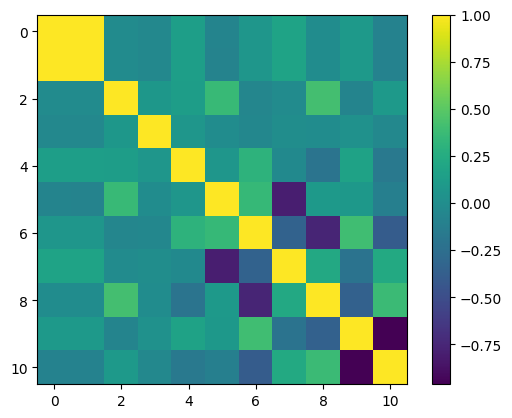

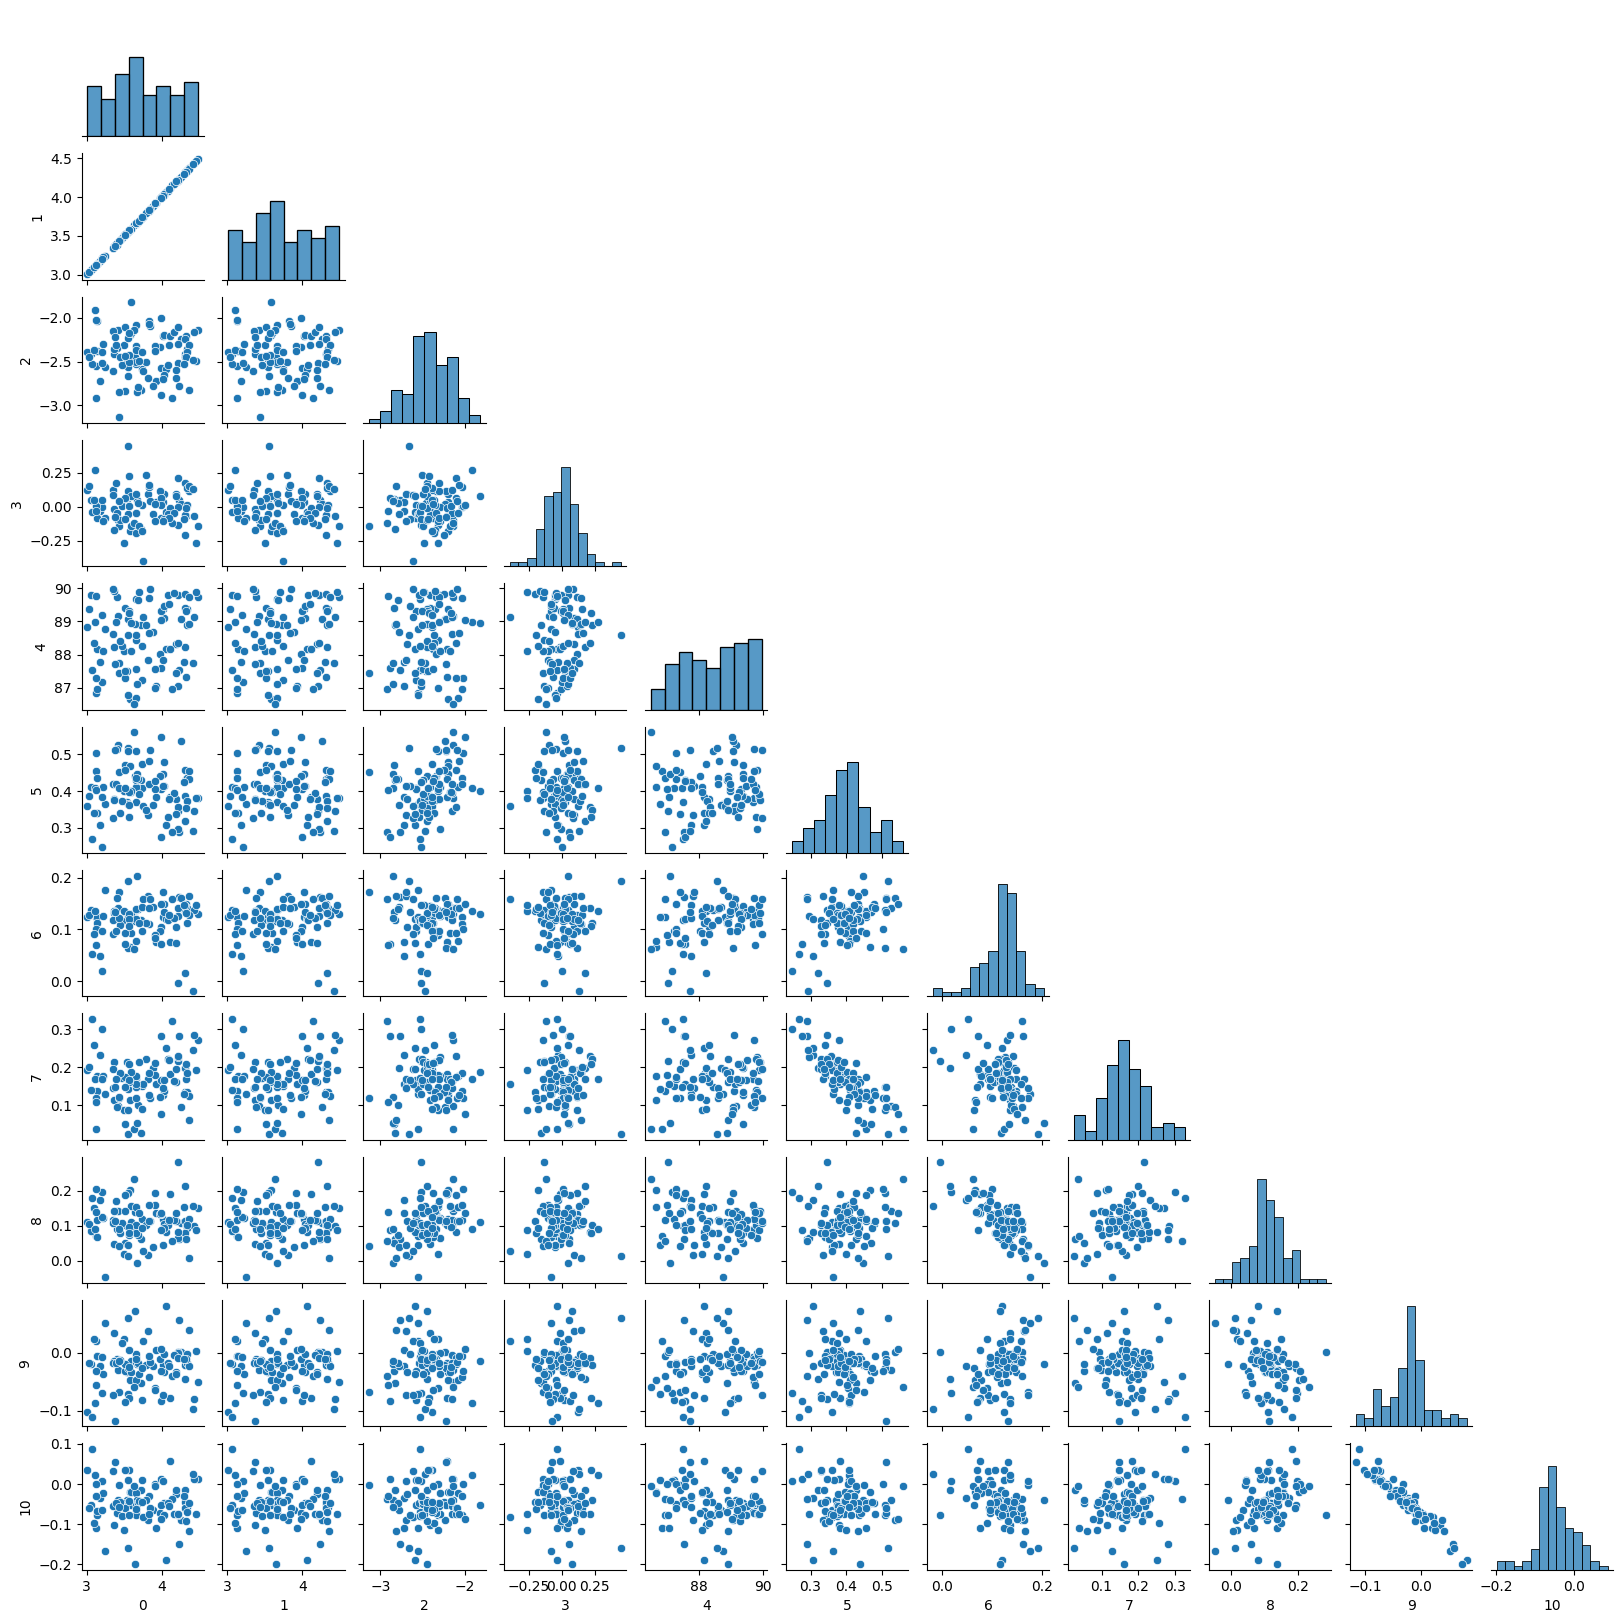

[0.41070746 0.41099692 0.25042372 0.12574439 0.97497741 0.06471388
 0.03808454 0.06191255 0.05344036 0.037833   0.0493974 ]


Processing in parallel:   0%|                                                                   | 0/100 [00:00<?, ?it/s]

local
local
local
local
locallocal

SpawnPoolWorker-10SpawnPoolWorker-9 9
 10
CUDA_VISIBLE_DEVICES=CUDA_VISIBLE_DEVICES=  00

SpawnPoolWorker-7SpawnPoolWorker-12  712

CUDA_VISIBLE_DEVICES= 0CUDA_VISIBLE_DEVICES=
 0
SpawnPoolWorker-8 8
CUDA_VISIBLE_DEVICES= 0
SpawnPoolWorker-11 11
CUDA_VISIBLE_DEVICES= 0


Processing in parallel: 100%|█████████████████████████████████████████████████████████| 100/100 [02:14<00:00,  1.34s/it]


(100, 11)


/home/jcottaar/miniconda3/envs/xlab/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


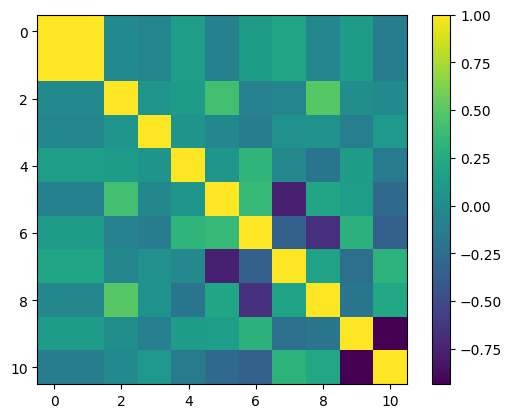

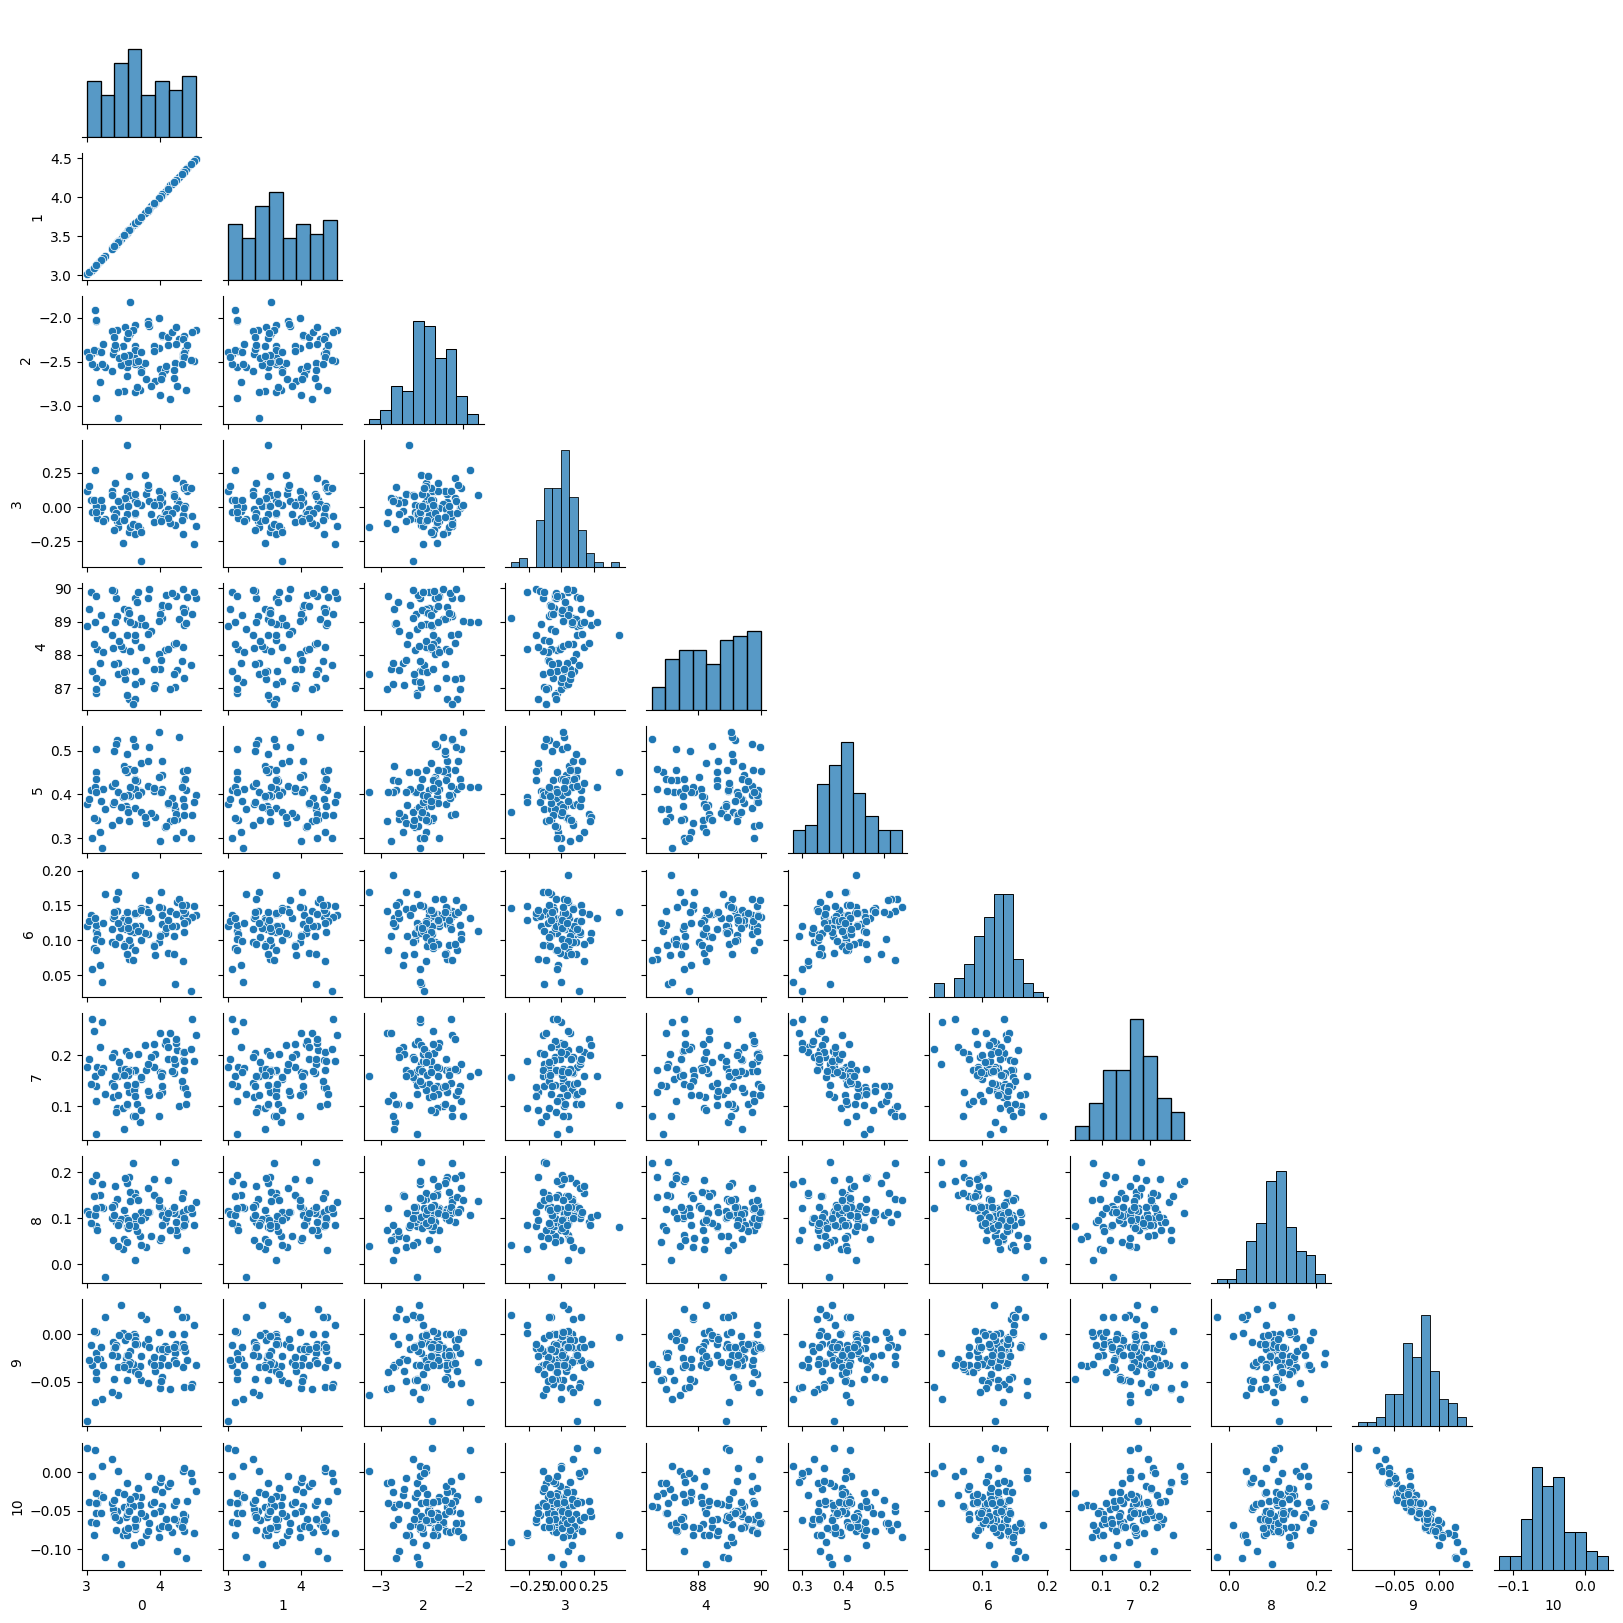

[0.41077155 0.41102084 0.25037897 0.12580915 0.97861162 0.05797711
 0.02940565 0.04860721 0.04401822 0.02230898 0.02940443]


Processing in parallel:   0%|                                                                   | 0/100 [00:00<?, ?it/s]

local
local
local
local
local
local
SpawnPoolWorker-18 18
CUDA_VISIBLE_DEVICES= 0
SpawnPoolWorker-13 13
CUDA_VISIBLE_DEVICES= 0
SpawnPoolWorker-15 15
CUDA_VISIBLE_DEVICES= 0
SpawnPoolWorker-14 14
CUDA_VISIBLE_DEVICES= 0
SpawnPoolWorker-16 16
CUDA_VISIBLE_DEVICES= 0
SpawnPoolWorker-17 17
CUDA_VISIBLE_DEVICES= 0


Processing in parallel: 100%|█████████████████████████████████████████████████████████| 100/100 [02:12<00:00,  1.33s/it]


(100, 11)


/home/jcottaar/miniconda3/envs/xlab/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


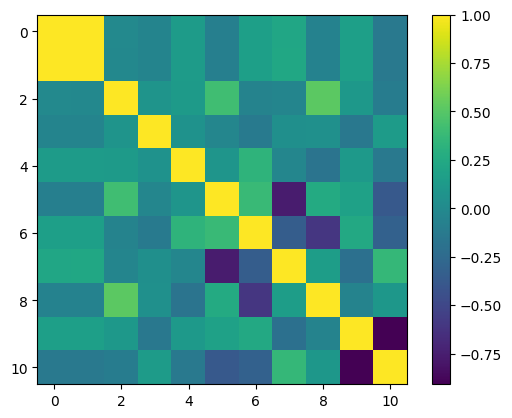

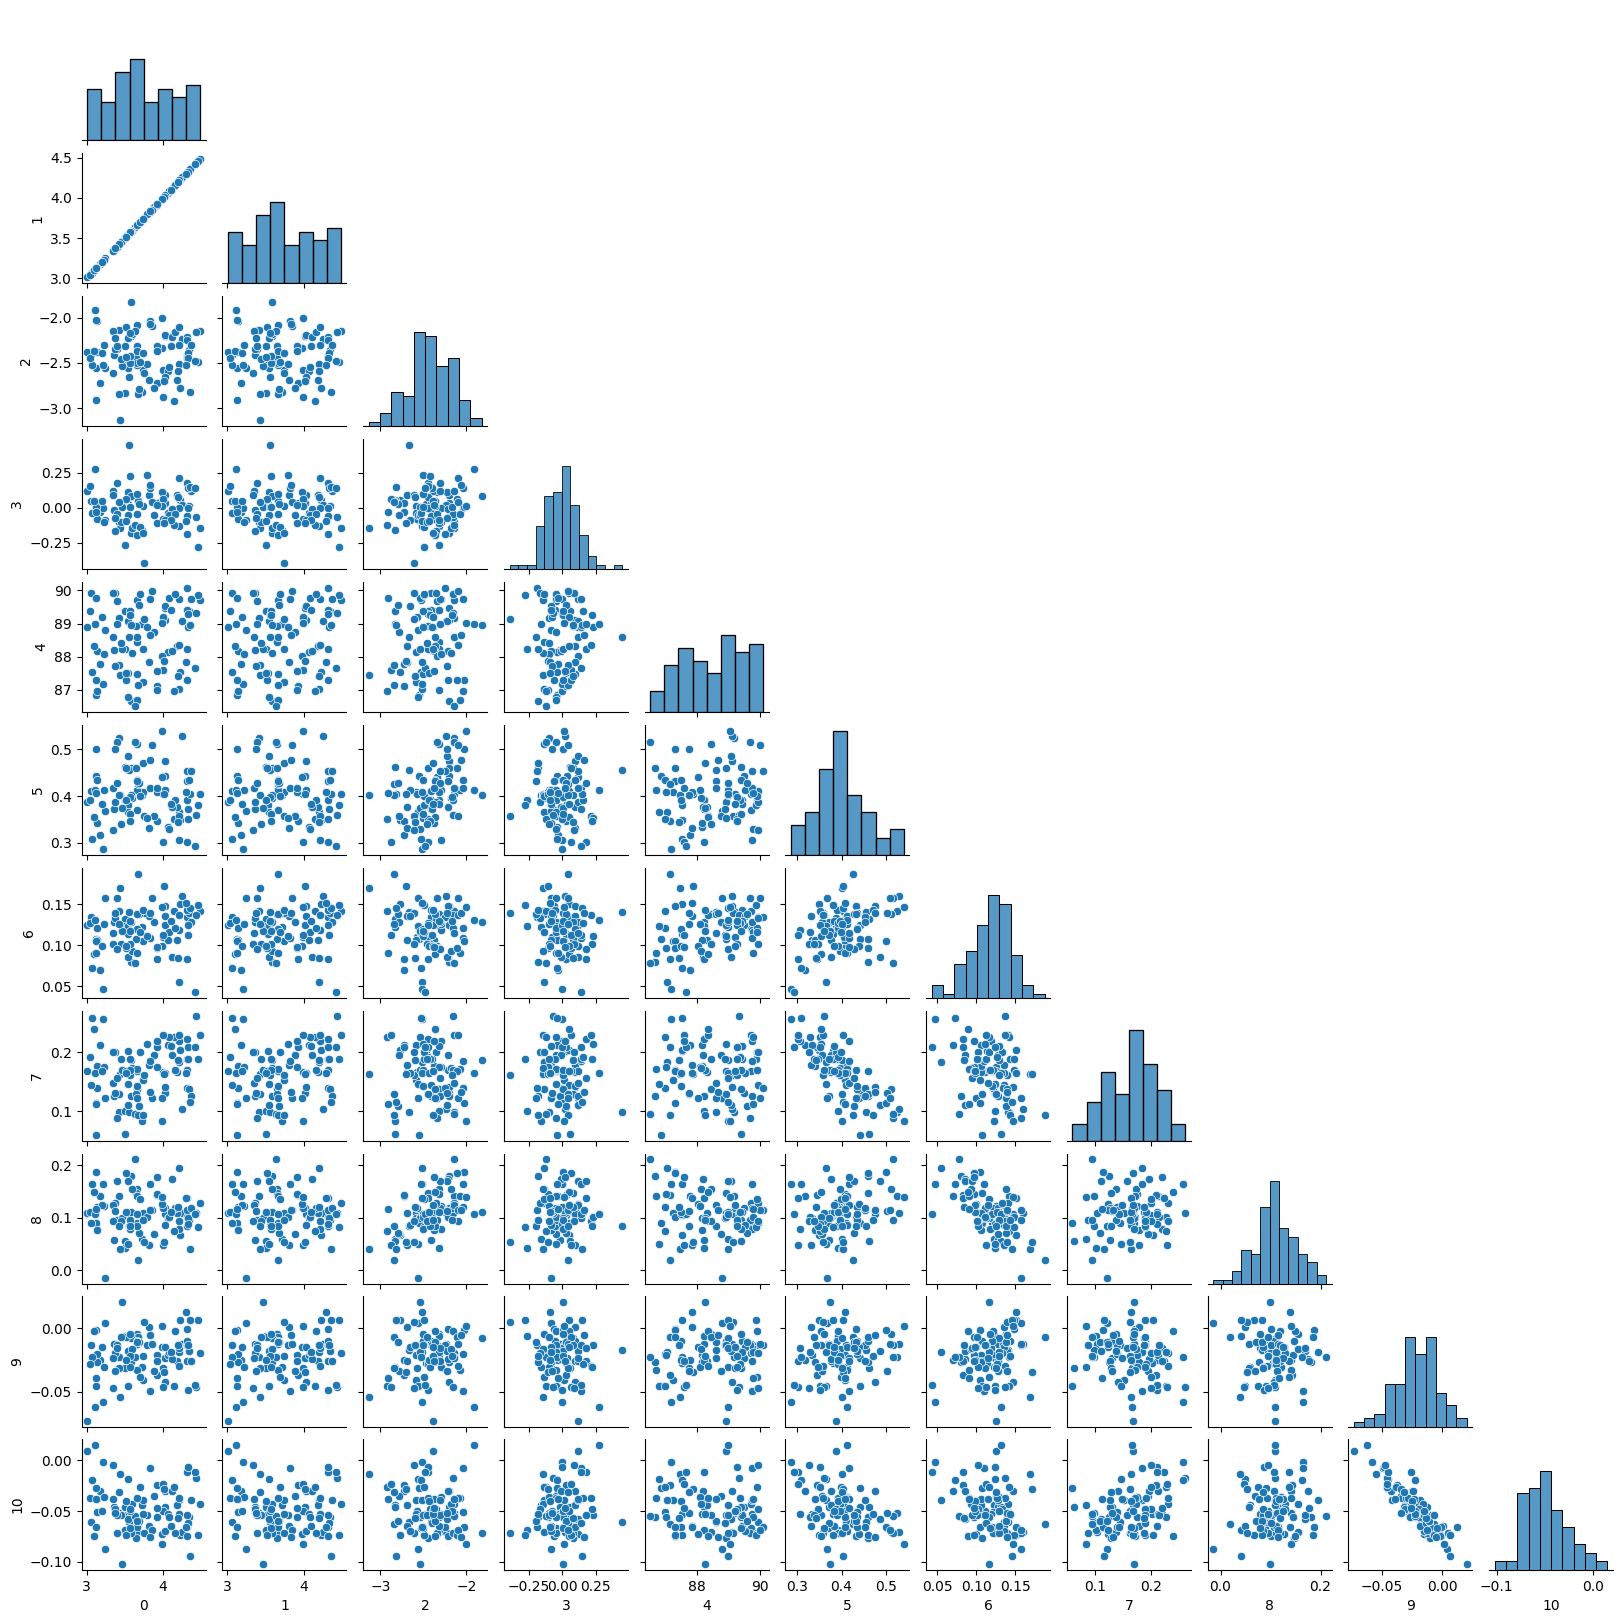

[0.41079429 0.41101393 0.2503259  0.12579401 0.97980707 0.05677531
 0.02630949 0.04477541 0.03994651 0.01677637 0.02225127]


Processing in parallel:   0%|                                                                   | 0/100 [00:00<?, ?it/s]

locallocal

local
local
local
local
SpawnPoolWorker-19 19
CUDA_VISIBLE_DEVICES= 0
SpawnPoolWorker-24 24
SpawnPoolWorker-20CUDA_VISIBLE_DEVICES= 0
 20
CUDA_VISIBLE_DEVICES= 0
SpawnPoolWorker-23 23
CUDA_VISIBLE_DEVICES= 0
SpawnPoolWorker-21 21
CUDA_VISIBLE_DEVICES= 0
SpawnPoolWorker-22 22
CUDA_VISIBLE_DEVICES= 0


Processing in parallel: 100%|█████████████████████████████████████████████████████████| 100/100 [02:13<00:00,  1.34s/it]


(100, 11)


/home/jcottaar/miniconda3/envs/xlab/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


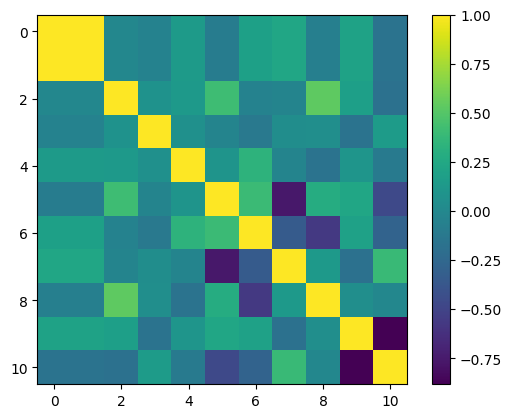

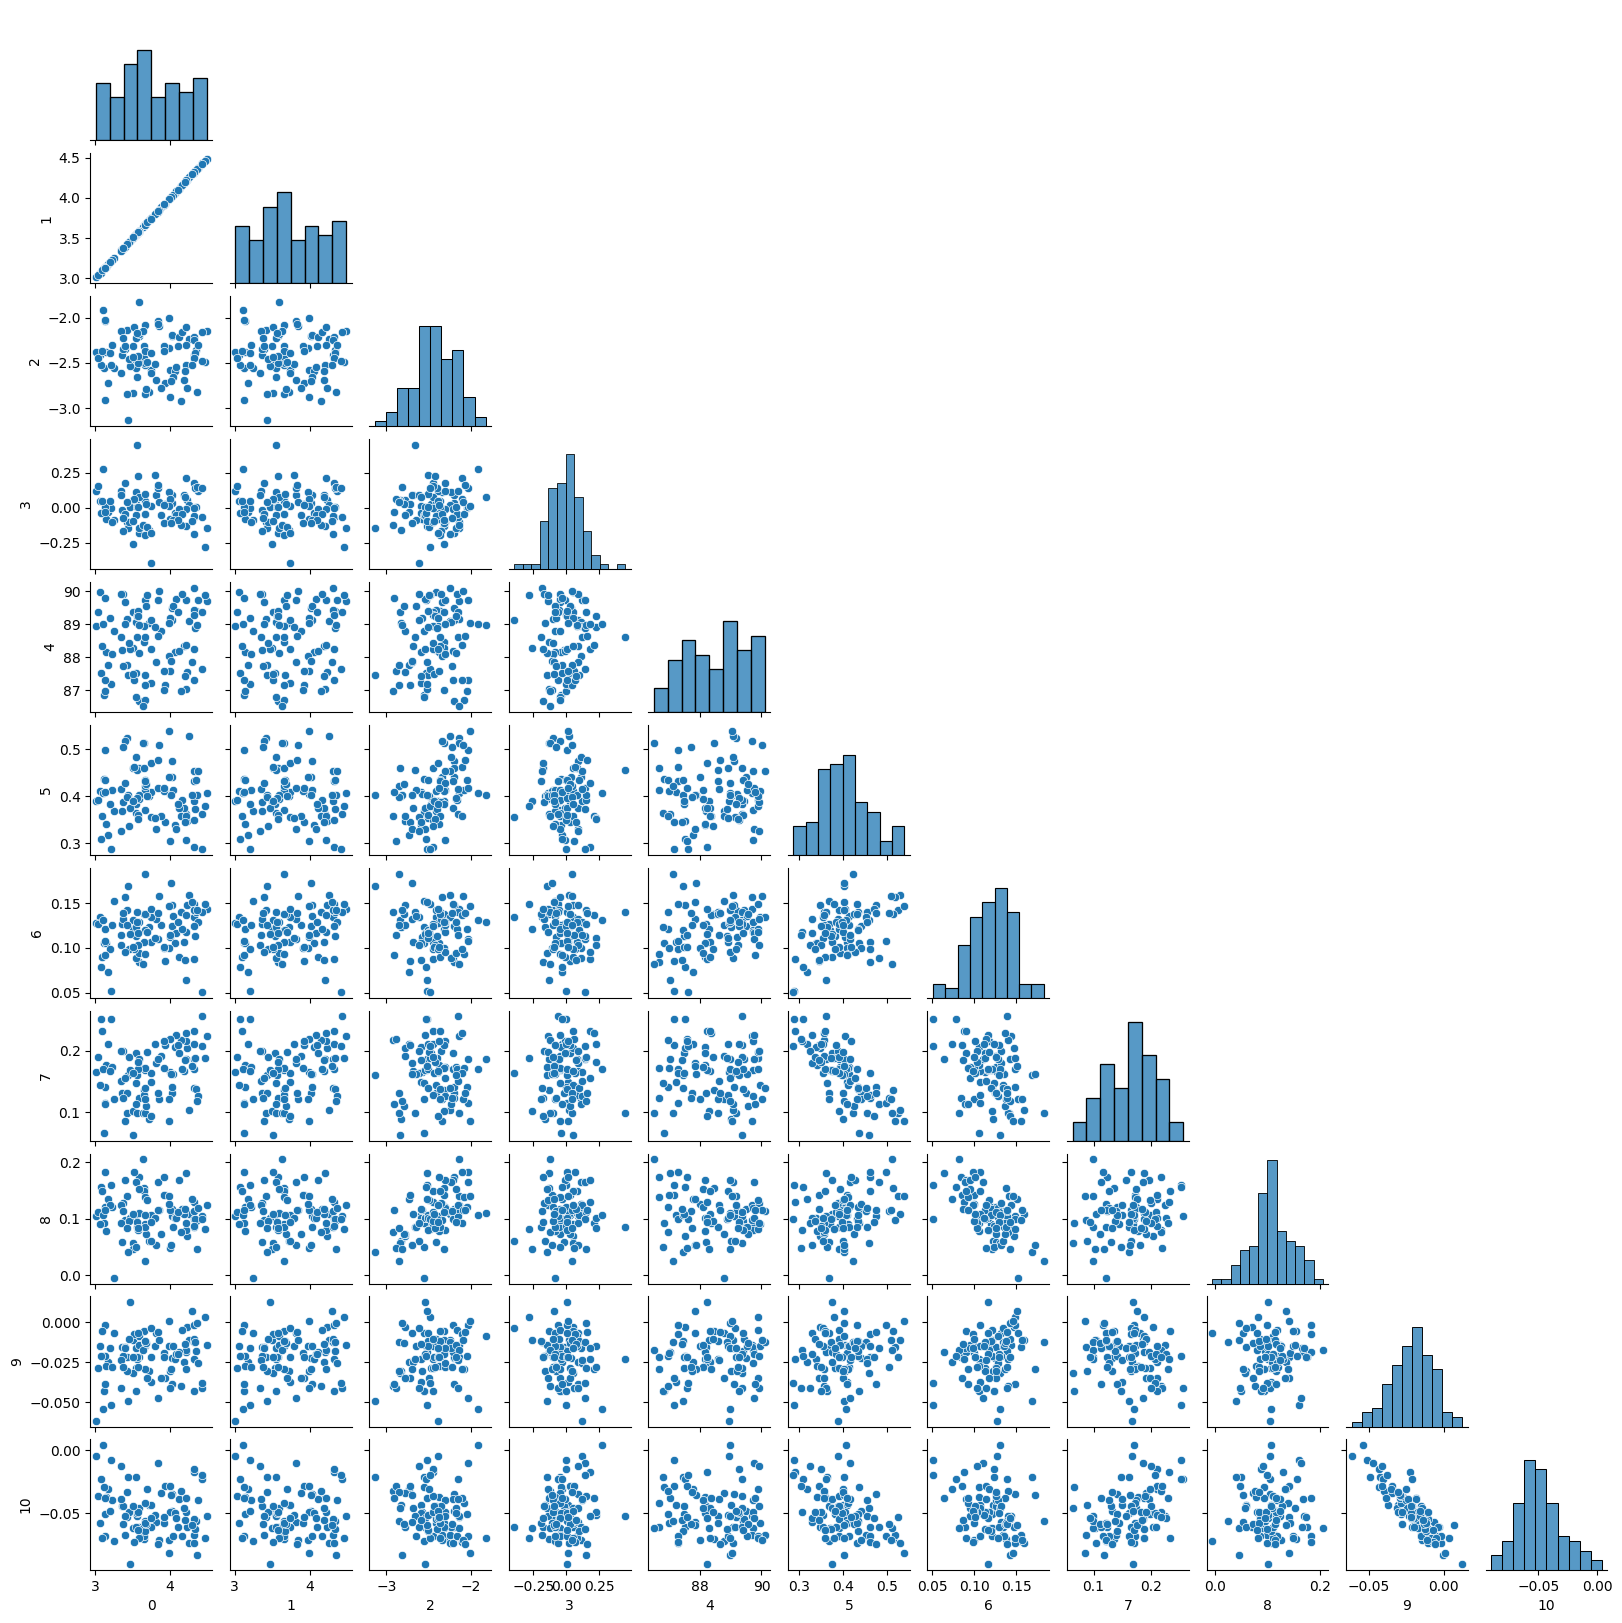

[0.4108057  0.41101059 0.25028795 0.12580323 0.97999836 0.05654453
 0.02475383 0.04330269 0.03769443 0.0138851  0.01862246]


Processing in parallel:   0%|                                                                   | 0/100 [00:00<?, ?it/s]

local
local
local
local
local
local
SpawnPoolWorker-28 28
CUDA_VISIBLE_DEVICES= 0
SpawnPoolWorker-25 25
CUDA_VISIBLE_DEVICES= 0
SpawnPoolWorker-30 30
CUDA_VISIBLE_DEVICES= 0
SpawnPoolWorker-26 26
SpawnPoolWorker-29 29
CUDA_VISIBLE_DEVICES= 0
CUDA_VISIBLE_DEVICES= 0
SpawnPoolWorker-27 27
CUDA_VISIBLE_DEVICES= 0


Processing in parallel: 100%|█████████████████████████████████████████████████████████| 100/100 [02:12<00:00,  1.33s/it]


(100, 11)


/home/jcottaar/miniconda3/envs/xlab/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


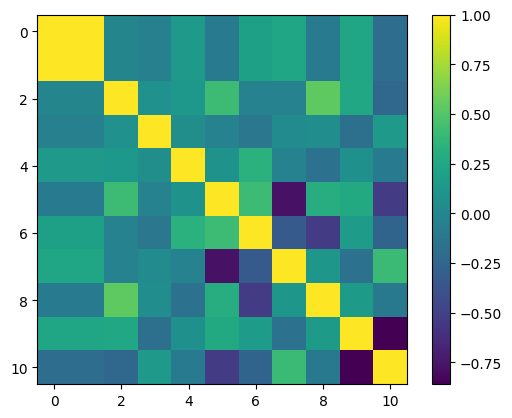

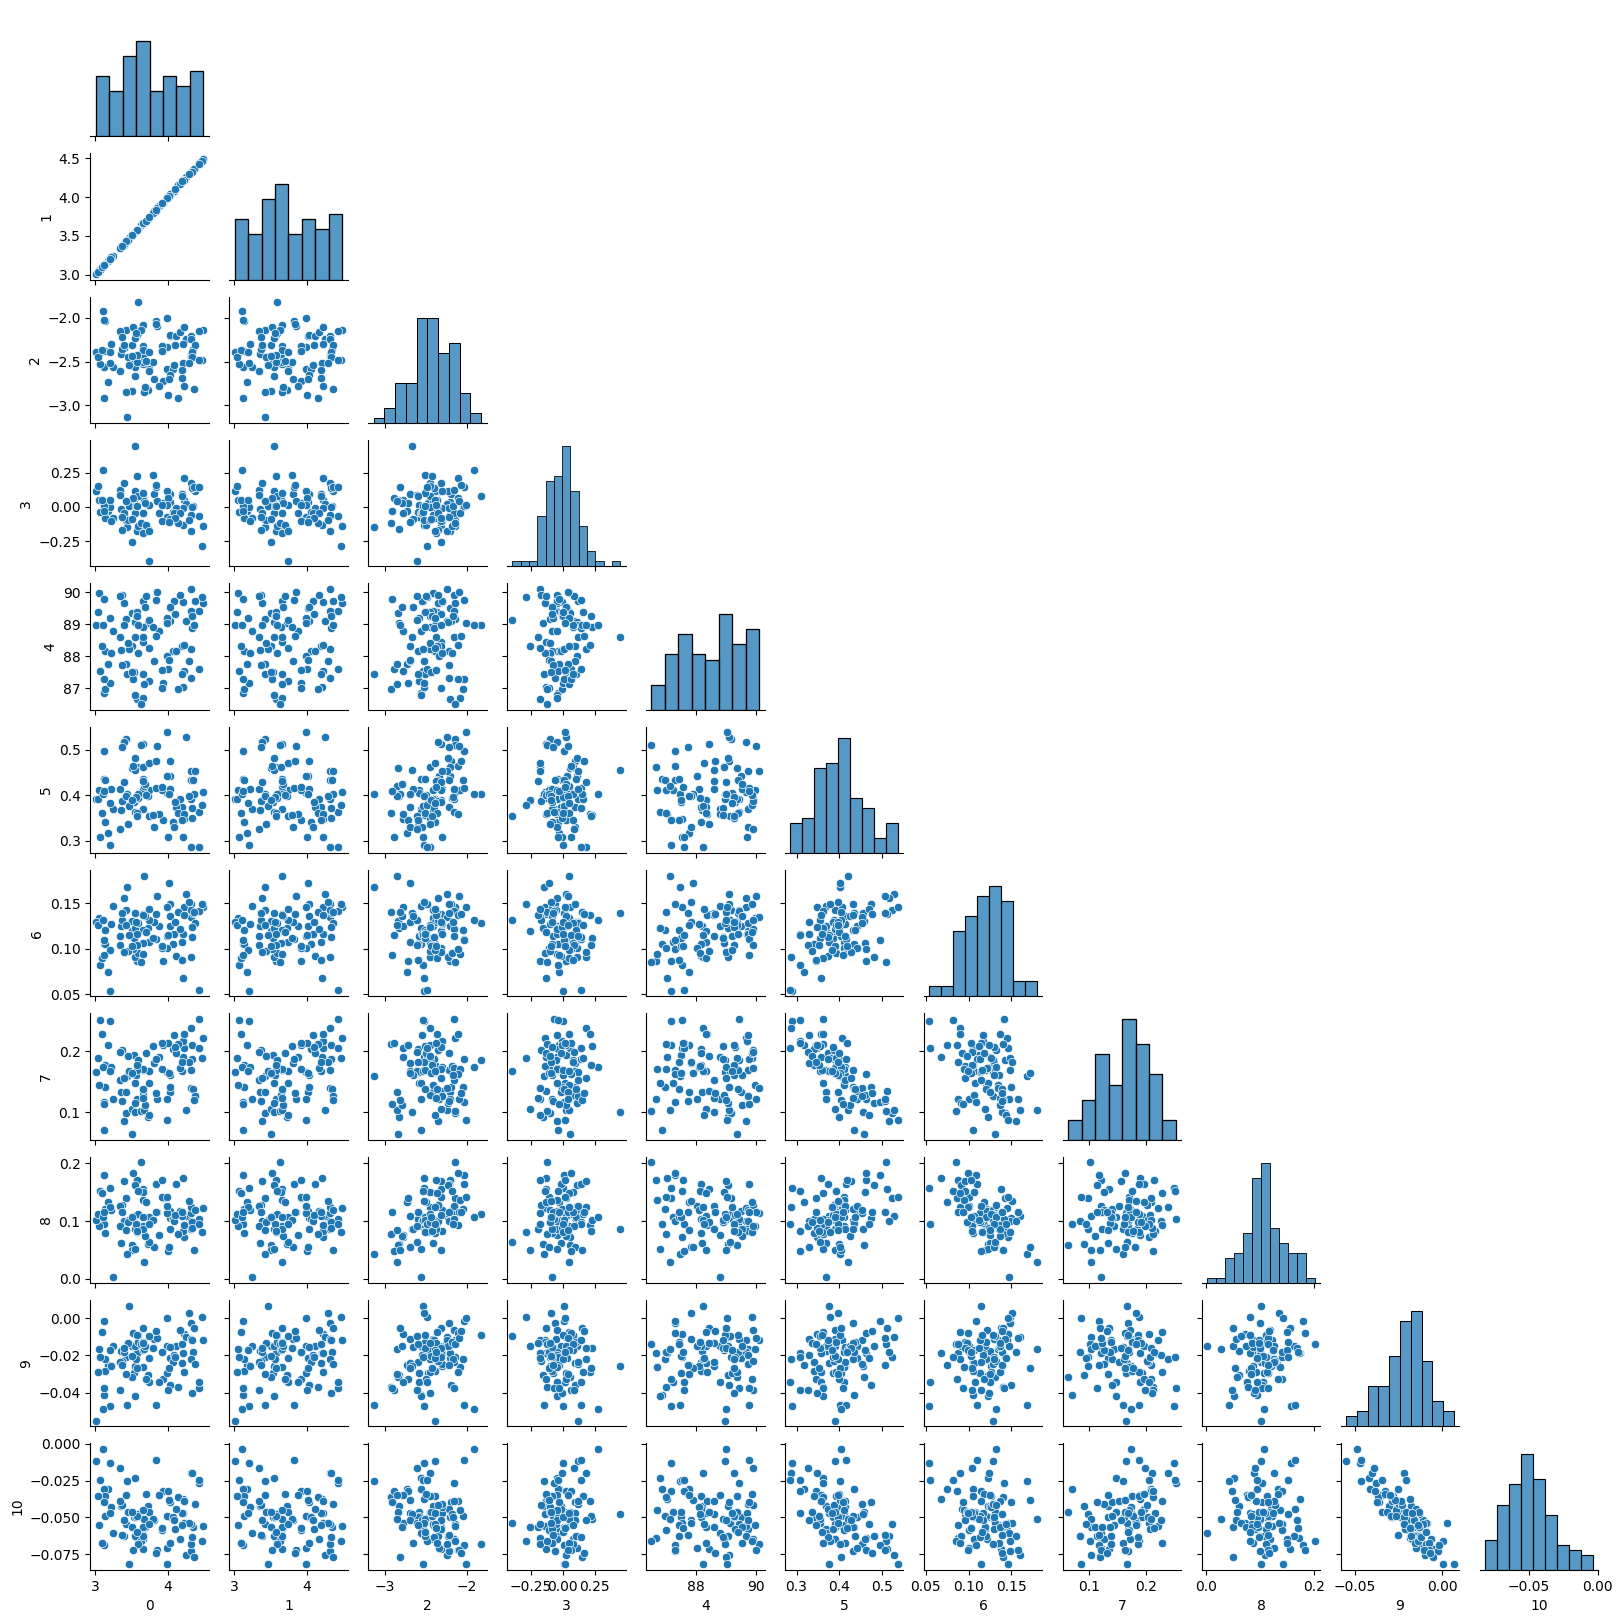

[0.41081106 0.41100889 0.25025732 0.12580529 0.97995463 0.05662742
 0.02385984 0.04275359 0.03625517 0.01216088 0.01659314]


Processing in parallel:   0%|                                                                  | 0/1099 [00:00<?, ?it/s]

local
local
local
local
SpawnPoolWorker-31 31
CUDA_VISIBLE_DEVICES= 0
SpawnPoolWorker-36 36
CUDA_VISIBLE_DEVICES= 0
SpawnPoolWorker-35 35
CUDA_VISIBLE_DEVICES= 0
SpawnPoolWorker-32 32
CUDA_VISIBLE_DEVICES= 0
local
local
SpawnPoolWorker-34 34
CUDA_VISIBLE_DEVICES= 0
SpawnPoolWorker-33 33
CUDA_VISIBLE_DEVICES= 0


Processing in parallel:   2%|█▏                                                       | 23/1099 [00:45<32:27,  1.81s/it]

New solver/alternative transit parameters fallback for planet id 94572221


Processing in parallel:   3%|█▋                                                       | 33/1099 [01:01<30:53,  1.74s/it]

New solver/alternative transit parameters fallback for planet id 152245846
New solver/alternative transit parameters fallback for planet id 155501234


Processing in parallel:   3%|█▉                                                       | 37/1099 [01:08<30:28,  1.72s/it]

New solver/alternative transit parameters fallback for planet id 166602615


Processing in parallel:   6%|███▌                                                     | 68/1099 [01:49<24:26,  1.42s/it]

New solver/alternative transit parameters fallback for planet id 237793157


Processing in parallel:   7%|████▎                                                    | 82/1099 [02:10<24:34,  1.45s/it]

New solver/alternative transit parameters fallback for planet id 291916399


Processing in parallel:   9%|████▉                                                    | 94/1099 [02:27<23:51,  1.42s/it]

New solver/alternative transit parameters fallback for planet id 342072318


Processing in parallel:  15%|████████▍                                               | 165/1099 [04:07<21:30,  1.38s/it]

New solver/alternative transit parameters fallback for planet id 656960256


Processing in parallel:  15%|████████▋                                               | 170/1099 [04:14<21:23,  1.38s/it]

New solver/alternative transit parameters fallback for planet id 691402002


Processing in parallel:  16%|████████▉                                               | 176/1099 [04:22<20:50,  1.35s/it]

New solver/alternative transit parameters fallback for planet id 715668790


Processing in parallel:  19%|██████████▊                                             | 211/1099 [05:13<20:44,  1.40s/it]

New solver/alternative transit parameters fallback for planet id 824937040


Processing in parallel:  19%|██████████▊                                             | 212/1099 [05:13<20:12,  1.37s/it]

New solver/alternative transit parameters fallback for planet id 829863746


Processing in parallel:  25%|█████████████▊                                          | 272/1099 [06:36<17:46,  1.29s/it]

New solver/alternative transit parameters fallback for planet id 1053204615


Processing in parallel:  26%|██████████████▌                                         | 285/1099 [06:59<19:32,  1.44s/it]

New solver/alternative transit parameters fallback for planet id 1124834224


Processing in parallel:  28%|███████████████▌                                        | 305/1099 [07:25<18:04,  1.37s/it]

New solver/alternative transit parameters fallback for planet id 1196027041


Processing in parallel:  30%|████████████████▋                                       | 327/1099 [07:57<17:42,  1.38s/it]

New solver/alternative transit parameters fallback for planet id 1267010874


Processing in parallel:  30%|████████████████▋                                       | 328/1099 [07:57<17:11,  1.34s/it]

New solver/alternative transit parameters fallback for planet id 1267583899


Processing in parallel:  30%|████████████████▊                                       | 329/1099 [08:01<18:08,  1.41s/it]

New solver/alternative transit parameters fallback for planet id 1293223638


Processing in parallel:  32%|█████████████████▋                                      | 347/1099 [08:26<17:14,  1.38s/it]

New solver/alternative transit parameters fallback for planet id 1329906799


Processing in parallel:  32%|█████████████████▊                                      | 350/1099 [08:32<17:34,  1.41s/it]

New solver/alternative transit parameters fallback for planet id 1349926825
Attempting chop


Processing in parallel:  32%|█████████████████▉                                      | 351/1099 [08:42<20:43,  1.66s/it]

New solver/alternative transit parameters fallback for planet id 1349926825
New solver/alternative transit parameters fallback for planet id 1349926825
New solver/alternative transit parameters fallback for planet id 1370040003


Processing in parallel:  35%|███████████████████▊                                    | 390/1099 [09:30<16:17,  1.38s/it]

New solver/alternative transit parameters fallback for planet id 1475386345


Processing in parallel:  37%|████████████████████▉                                   | 411/1099 [09:58<15:16,  1.33s/it]

New solver/alternative transit parameters fallback for planet id 1547333761
Attempting chop


Processing in parallel:  37%|████████████████████▉                                   | 412/1099 [10:03<16:31,  1.44s/it]

New solver/alternative transit parameters fallback for planet id 1547333761


Processing in parallel:  38%|█████████████████████                                   | 413/1099 [10:04<16:22,  1.43s/it]

New solver/alternative transit parameters fallback for planet id 1554618542


Processing in parallel:  38%|█████████████████████                                   | 414/1099 [10:05<16:06,  1.41s/it]

Chop used on planet id 1547333761


Processing in parallel:  44%|████████████████████████▊                               | 487/1099 [11:49<13:52,  1.36s/it]

New solver/alternative transit parameters fallback for planet id 1834181716


Processing in parallel:  46%|█████████████████████████▌                              | 501/1099 [12:11<14:12,  1.42s/it]

New solver/alternative transit parameters fallback for planet id 1876150924


Processing in parallel:  49%|███████████████████████████▋                            | 543/1099 [13:10<13:13,  1.43s/it]

New solver/alternative transit parameters fallback for planet id 2069619536


Processing in parallel:  50%|███████████████████████████▉                            | 548/1099 [13:14<12:02,  1.31s/it]

New solver/alternative transit parameters fallback for planet id 2074730139


Processing in parallel:  50%|███████████████████████████▉                            | 549/1099 [13:21<14:00,  1.53s/it]

New solver/alternative transit parameters fallback for planet id 2097642218
New solver/alternative transit parameters fallback for planet id 2101537217


Processing in parallel:  54%|██████████████████████████████▏                         | 592/1099 [14:19<11:30,  1.36s/it]

New solver/alternative transit parameters fallback for planet id 2259395627


Processing in parallel:  54%|██████████████████████████████▏                         | 593/1099 [14:20<11:25,  1.35s/it]

New solver/alternative transit parameters fallback for planet id 2254664280
New solver/alternative transit parameters fallback for planet id 2264735129


Processing in parallel:  57%|███████████████████████████████▋                        | 622/1099 [15:05<11:39,  1.47s/it]

New solver/alternative transit parameters fallback for planet id 2387200917


Processing in parallel:  59%|████████████████████████████████▉                       | 646/1099 [15:39<10:52,  1.44s/it]

New solver/alternative transit parameters fallback for planet id 2495453637


Processing in parallel:  61%|█████████████████████████████████▉                      | 667/1099 [16:09<10:08,  1.41s/it]

New solver/alternative transit parameters fallback for planet id 2562716556


Processing in parallel:  65%|████████████████████████████████████▍                   | 716/1099 [17:17<08:36,  1.35s/it]

New solver/alternative transit parameters fallback for planet id 2760210399


Processing in parallel:  70%|███████████████████████████████████████▍                | 774/1099 [18:40<07:31,  1.39s/it]

New solver/alternative transit parameters fallback for planet id 3062170297


Processing in parallel:  71%|███████████████████████████████████████▌                | 776/1099 [18:44<07:46,  1.44s/it]

New solver/alternative transit parameters fallback for planet id 3062684318


Processing in parallel:  72%|████████████████████████████████████████                | 786/1099 [18:56<07:07,  1.37s/it]

New solver/alternative transit parameters fallback for planet id 3098975946


Processing in parallel:  72%|████████████████████████████████████████                | 787/1099 [18:59<07:17,  1.40s/it]

New solver/alternative transit parameters fallback for planet id 3126879162


Processing in parallel:  73%|█████████████████████████████████████████               | 806/1099 [19:29<07:17,  1.49s/it]

New solver/alternative transit parameters fallback for planet id 3188116178


Processing in parallel:  74%|█████████████████████████████████████████▌              | 816/1099 [19:40<06:29,  1.38s/it]

New solver/alternative transit parameters fallback for planet id 3206727630


Processing in parallel:  77%|███████████████████████████████████████████▏            | 847/1099 [20:25<05:46,  1.38s/it]

New solver/alternative transit parameters fallback for planet id 3317944304


Processing in parallel:  77%|███████████████████████████████████████████▎            | 849/1099 [20:31<06:15,  1.50s/it]

New solver/alternative transit parameters fallback for planet id 3344833436


Processing in parallel:  80%|████████████████████████████████████████████▉           | 881/1099 [21:15<05:08,  1.41s/it]

New solver/alternative transit parameters fallback for planet id 3469305332


Processing in parallel:  81%|█████████████████████████████████████████████▌          | 893/1099 [21:33<04:56,  1.44s/it]

New solver/alternative transit parameters fallback for planet id 3512283046


Processing in parallel:  85%|███████████████████████████████████████████████▍        | 931/1099 [22:28<04:00,  1.43s/it]

New solver/alternative transit parameters fallback for planet id 3653339152


Processing in parallel:  86%|████████████████████████████████████████████████        | 942/1099 [22:42<03:36,  1.38s/it]

New solver/alternative transit parameters fallback for planet id 3679528633


Processing in parallel:  88%|█████████████████████████████████████████████████       | 962/1099 [23:11<03:10,  1.39s/it]

New solver/alternative transit parameters fallback for planet id 3786449677


Processing in parallel:  90%|██████████████████████████████████████████████████▌     | 992/1099 [23:55<02:30,  1.41s/it]

New solver/alternative transit parameters fallback for planet id 3884695798


Processing in parallel:  91%|██████████████████████████████████████████████████▊     | 996/1099 [24:00<02:23,  1.40s/it]

Attempting chop
New solver/alternative transit parameters fallback for planet id 3884695798
New solver/alternative transit parameters fallback for planet id 3928265625
Chop used on planet id 3884695798
Attempting chop
New solver/alternative transit parameters fallback for planet id 3928265625


Processing in parallel:  91%|██████████████████████████████████████████████████▊     | 998/1099 [24:13<02:56,  1.75s/it]

New solver/alternative transit parameters fallback for planet id 3955853901
New solver/alternative transit parameters fallback for planet id 3965882786
Chop used on planet id 3928265625


Processing in parallel:  93%|███████████████████████████████████████████████████▍   | 1027/1099 [24:47<01:43,  1.43s/it]

New solver/alternative transit parameters fallback for planet id 4059234082


Processing in parallel:  95%|████████████████████████████████████████████████████   | 1040/1099 [25:05<01:23,  1.41s/it]

New solver/alternative transit parameters fallback for planet id 4087358670


Processing in parallel:  97%|█████████████████████████████████████████████████████▏ | 1063/1099 [25:38<00:51,  1.44s/it]

New solver/alternative transit parameters fallback for planet id 4190752810


Processing in parallel:  98%|█████████████████████████████████████████████████████▋ | 1073/1099 [25:50<00:35,  1.37s/it]

New solver/alternative transit parameters fallback for planet id 4220529965


Processing in parallel:  98%|█████████████████████████████████████████████████████▉ | 1077/1099 [25:56<00:29,  1.36s/it]

New solver/alternative transit parameters fallback for planet id 4232767776


Processing in parallel:  99%|██████████████████████████████████████████████████████▋| 1093/1099 [26:21<00:08,  1.44s/it]

New solver/alternative transit parameters fallback for planet id 4293108648


Processing in parallel: 100%|███████████████████████████████████████████████████████| 1099/1099 [26:30<00:00,  1.45s/it]


(1084, 11)


/home/jcottaar/miniconda3/envs/xlab/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


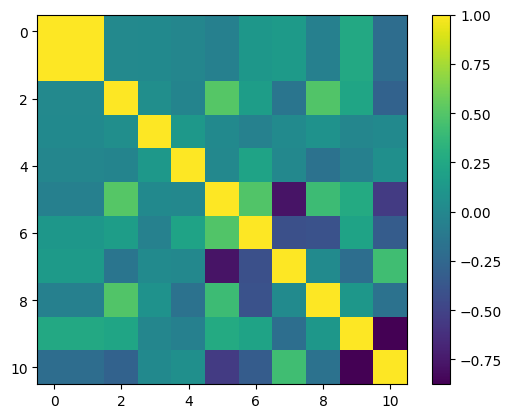

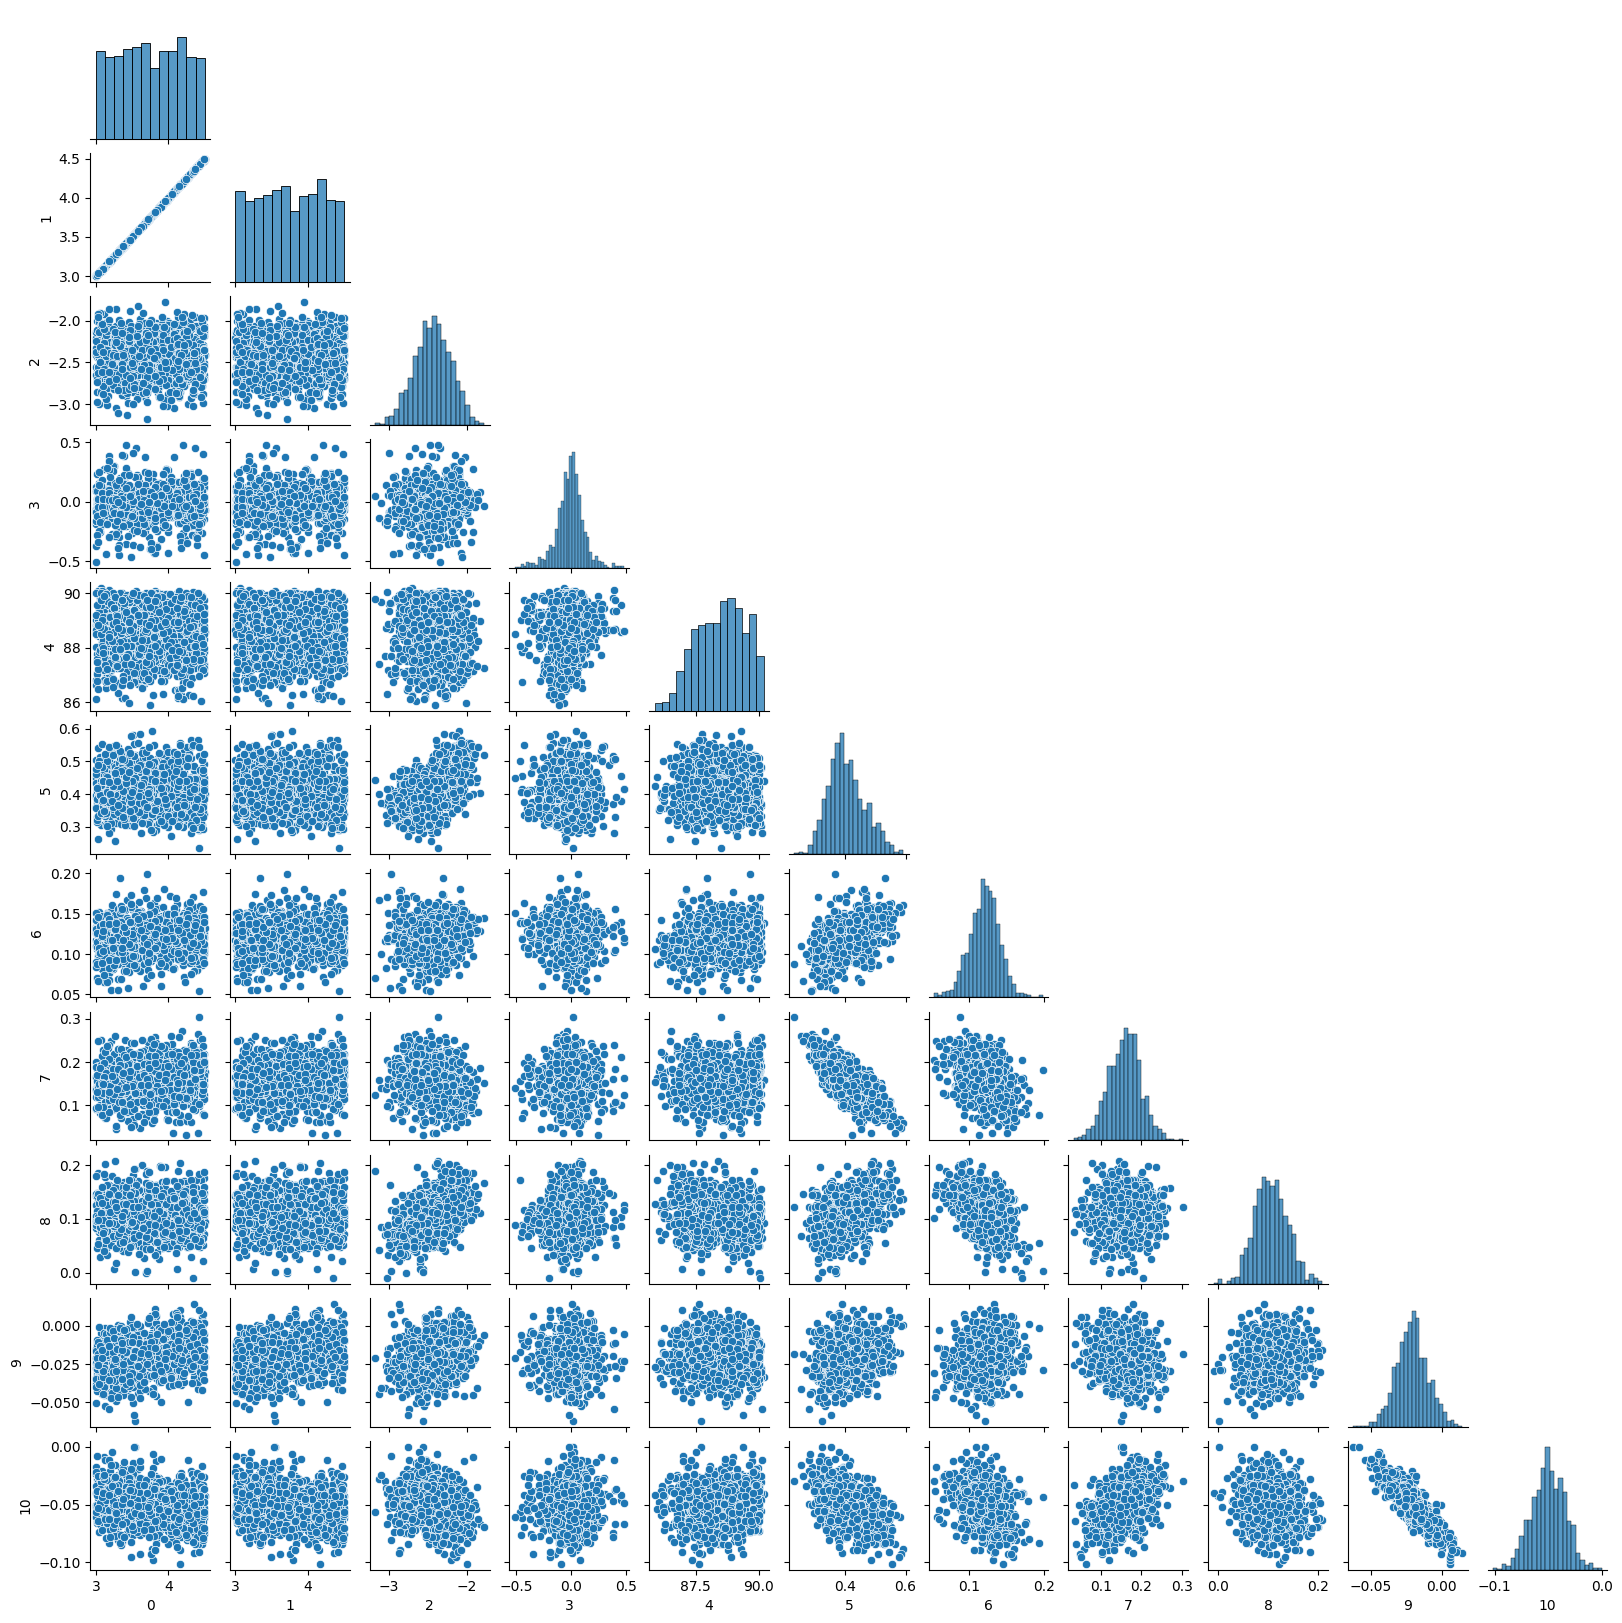

[0.43280572 0.4327554  0.23473581 0.12794022 0.94895113 0.06033608
 0.0201029  0.04015409 0.03336755 0.01119084 0.01571178]


Processing in parallel:   0%|                                                                  | 0/1099 [00:00<?, ?it/s]

locallocal

local
local
local
local
SpawnPoolWorker-41SpawnPoolWorker-40 40
 41
CUDA_VISIBLE_DEVICES= 0
CUDA_VISIBLE_DEVICES= 0
SpawnPoolWorker-37 37
CUDA_VISIBLE_DEVICES= 0
SpawnPoolWorker-38 38
CUDA_VISIBLE_DEVICES= 0
SpawnPoolWorker-39 39
CUDA_VISIBLE_DEVICES= 0
SpawnPoolWorker-42 42
CUDA_VISIBLE_DEVICES= 0


Processing in parallel: 100%|███████████████████████████████████████████████████████| 1099/1099 [22:43<00:00,  1.24s/it]


(1083, 11)


/home/jcottaar/miniconda3/envs/xlab/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


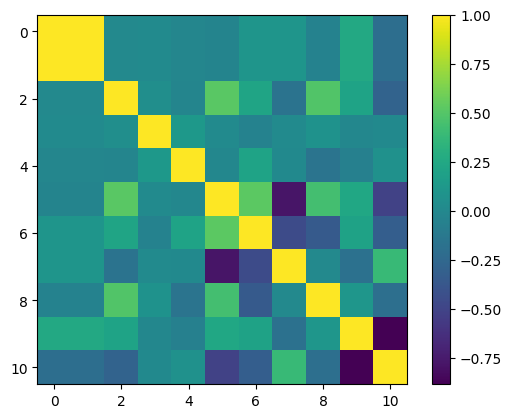

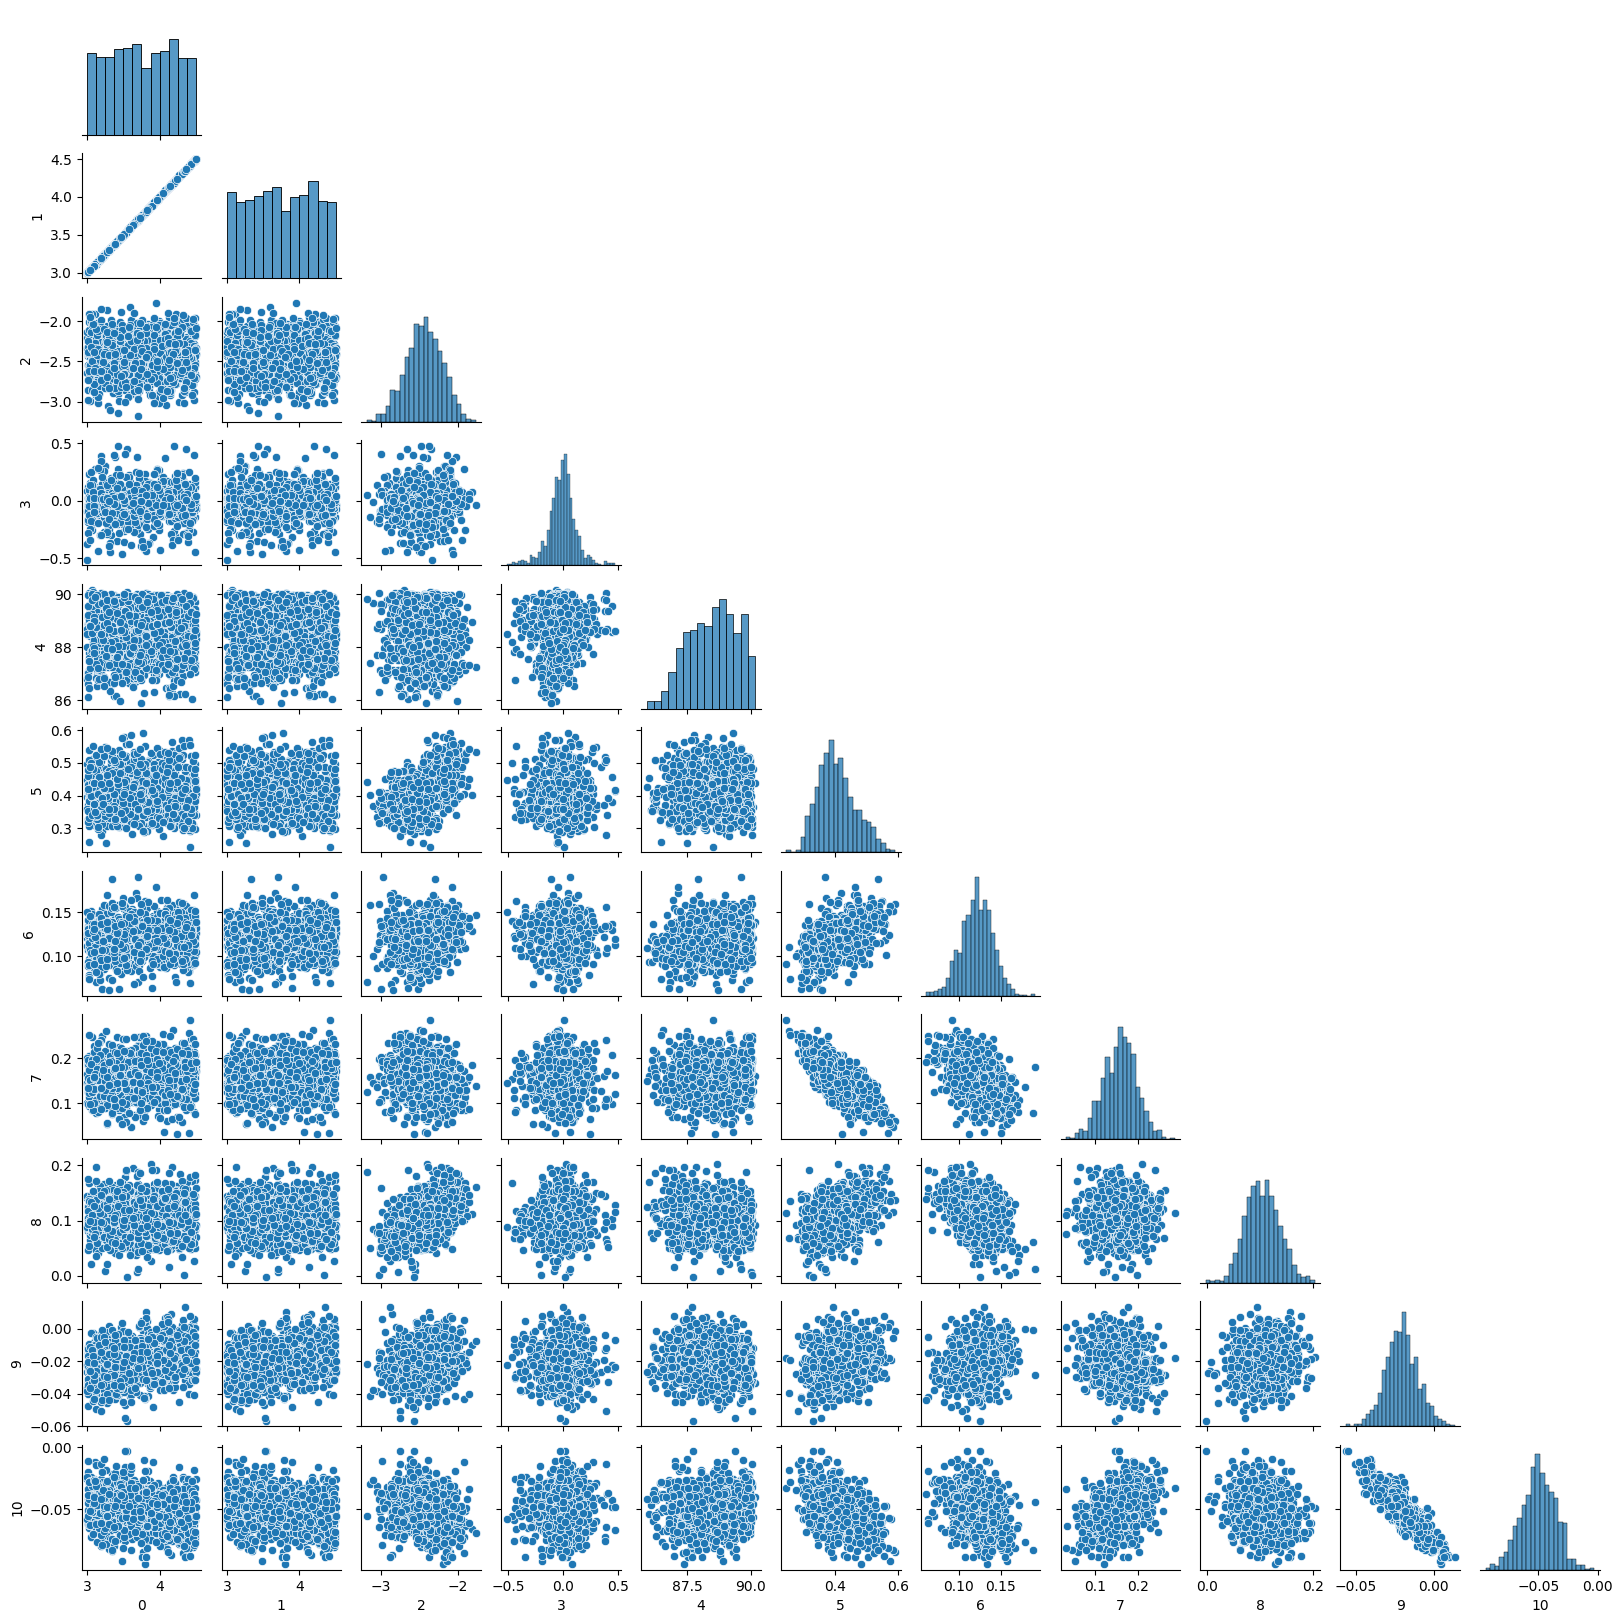

[0.43286194 0.43269923 0.23490255 0.12792161 0.94988818 0.06013597
 0.01869019 0.03845894 0.03221282 0.01043993 0.01456162]


Processing in parallel:   0%|                                                                  | 0/1099 [00:00<?, ?it/s]

locallocal

local
local
local
local
SpawnPoolWorker-47SpawnPoolWorker-43 43
 47
CUDA_VISIBLE_DEVICES= 0
CUDA_VISIBLE_DEVICES= 0
SpawnPoolWorker-46 46
CUDA_VISIBLE_DEVICES= 0
SpawnPoolWorker-45 45
SpawnPoolWorker-44 44
CUDA_VISIBLE_DEVICES= 0
CUDA_VISIBLE_DEVICES= 0
SpawnPoolWorker-48 48
CUDA_VISIBLE_DEVICES= 0


Processing in parallel: 100%|███████████████████████████████████████████████████████| 1099/1099 [22:49<00:00,  1.25s/it]


(1084, 11)


/home/jcottaar/miniconda3/envs/xlab/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


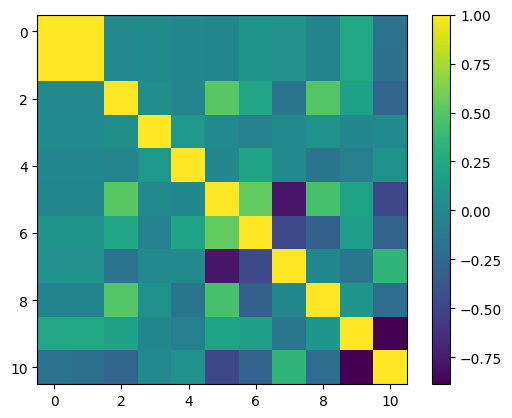

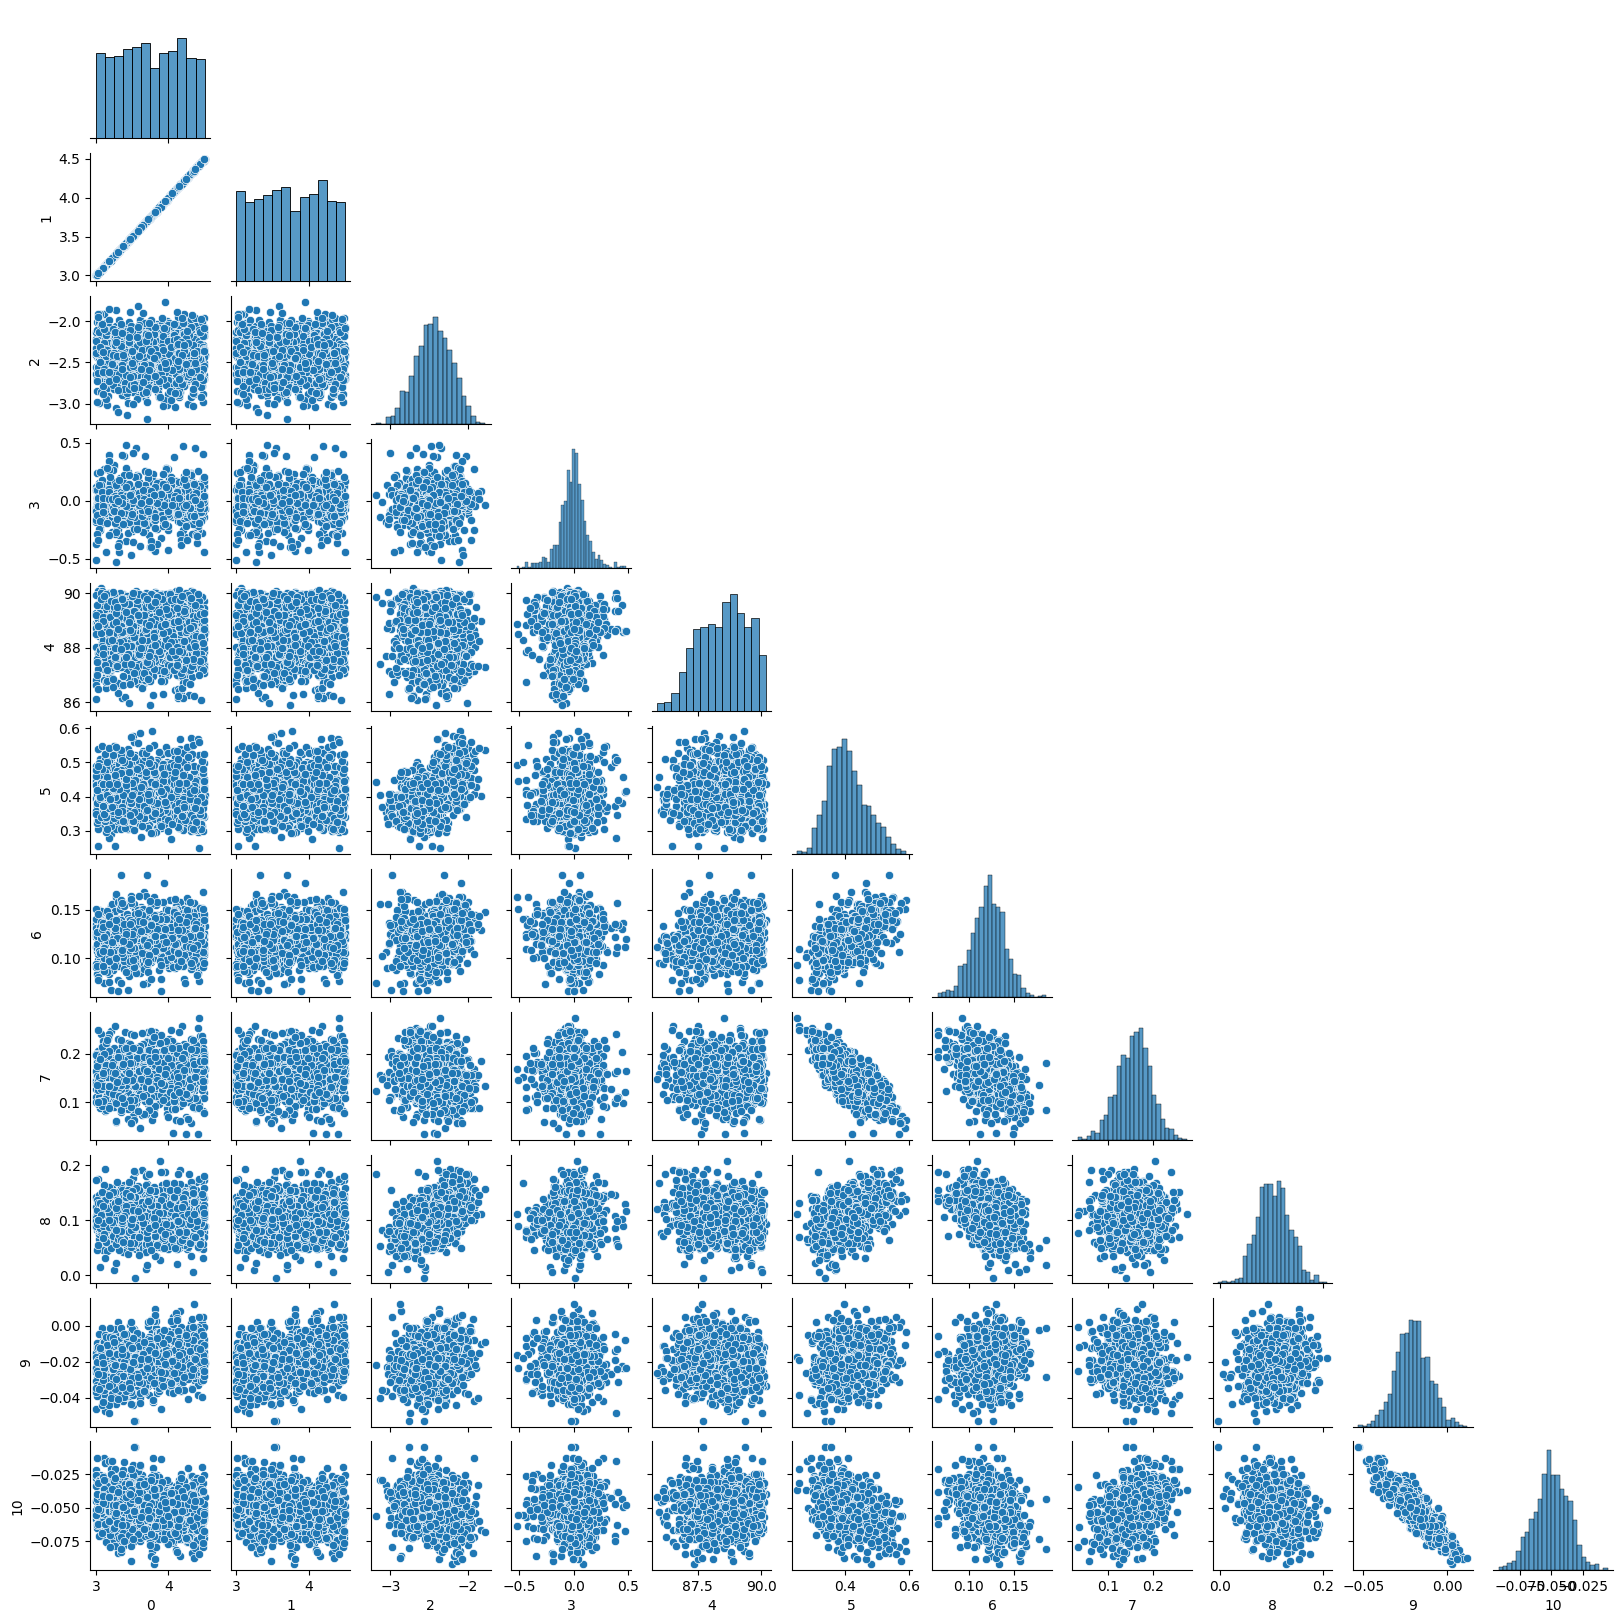

[0.43293013 0.43273255 0.23502765 0.12871802 0.95116902 0.05986598
 0.01786546 0.03747901 0.03172919 0.00990789 0.0136822 ]


Processing in parallel:   0%|                                                                  | 0/1099 [00:00<?, ?it/s]

local
local
local
local
local
local
SpawnPoolWorker-52 52
CUDA_VISIBLE_DEVICES= 0
SpawnPoolWorker-51 51
CUDA_VISIBLE_DEVICES= 0
SpawnPoolWorker-54 54
CUDA_VISIBLE_DEVICES= 0
SpawnPoolWorker-50 50
SpawnPoolWorker-49 49
CUDA_VISIBLE_DEVICES= 0
CUDA_VISIBLE_DEVICES= 0
SpawnPoolWorker-53 53
CUDA_VISIBLE_DEVICES= 0


Processing in parallel: 100%|███████████████████████████████████████████████████████| 1099/1099 [22:51<00:00,  1.25s/it]


(1084, 11)


/home/jcottaar/miniconda3/envs/xlab/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


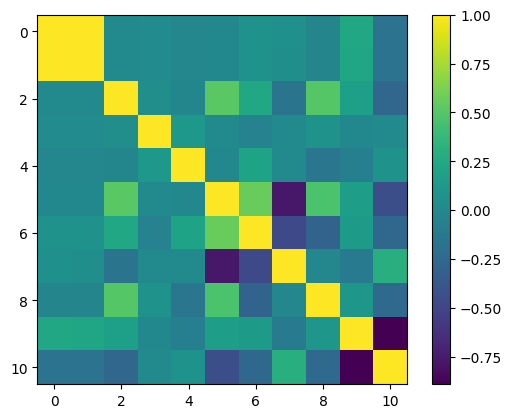

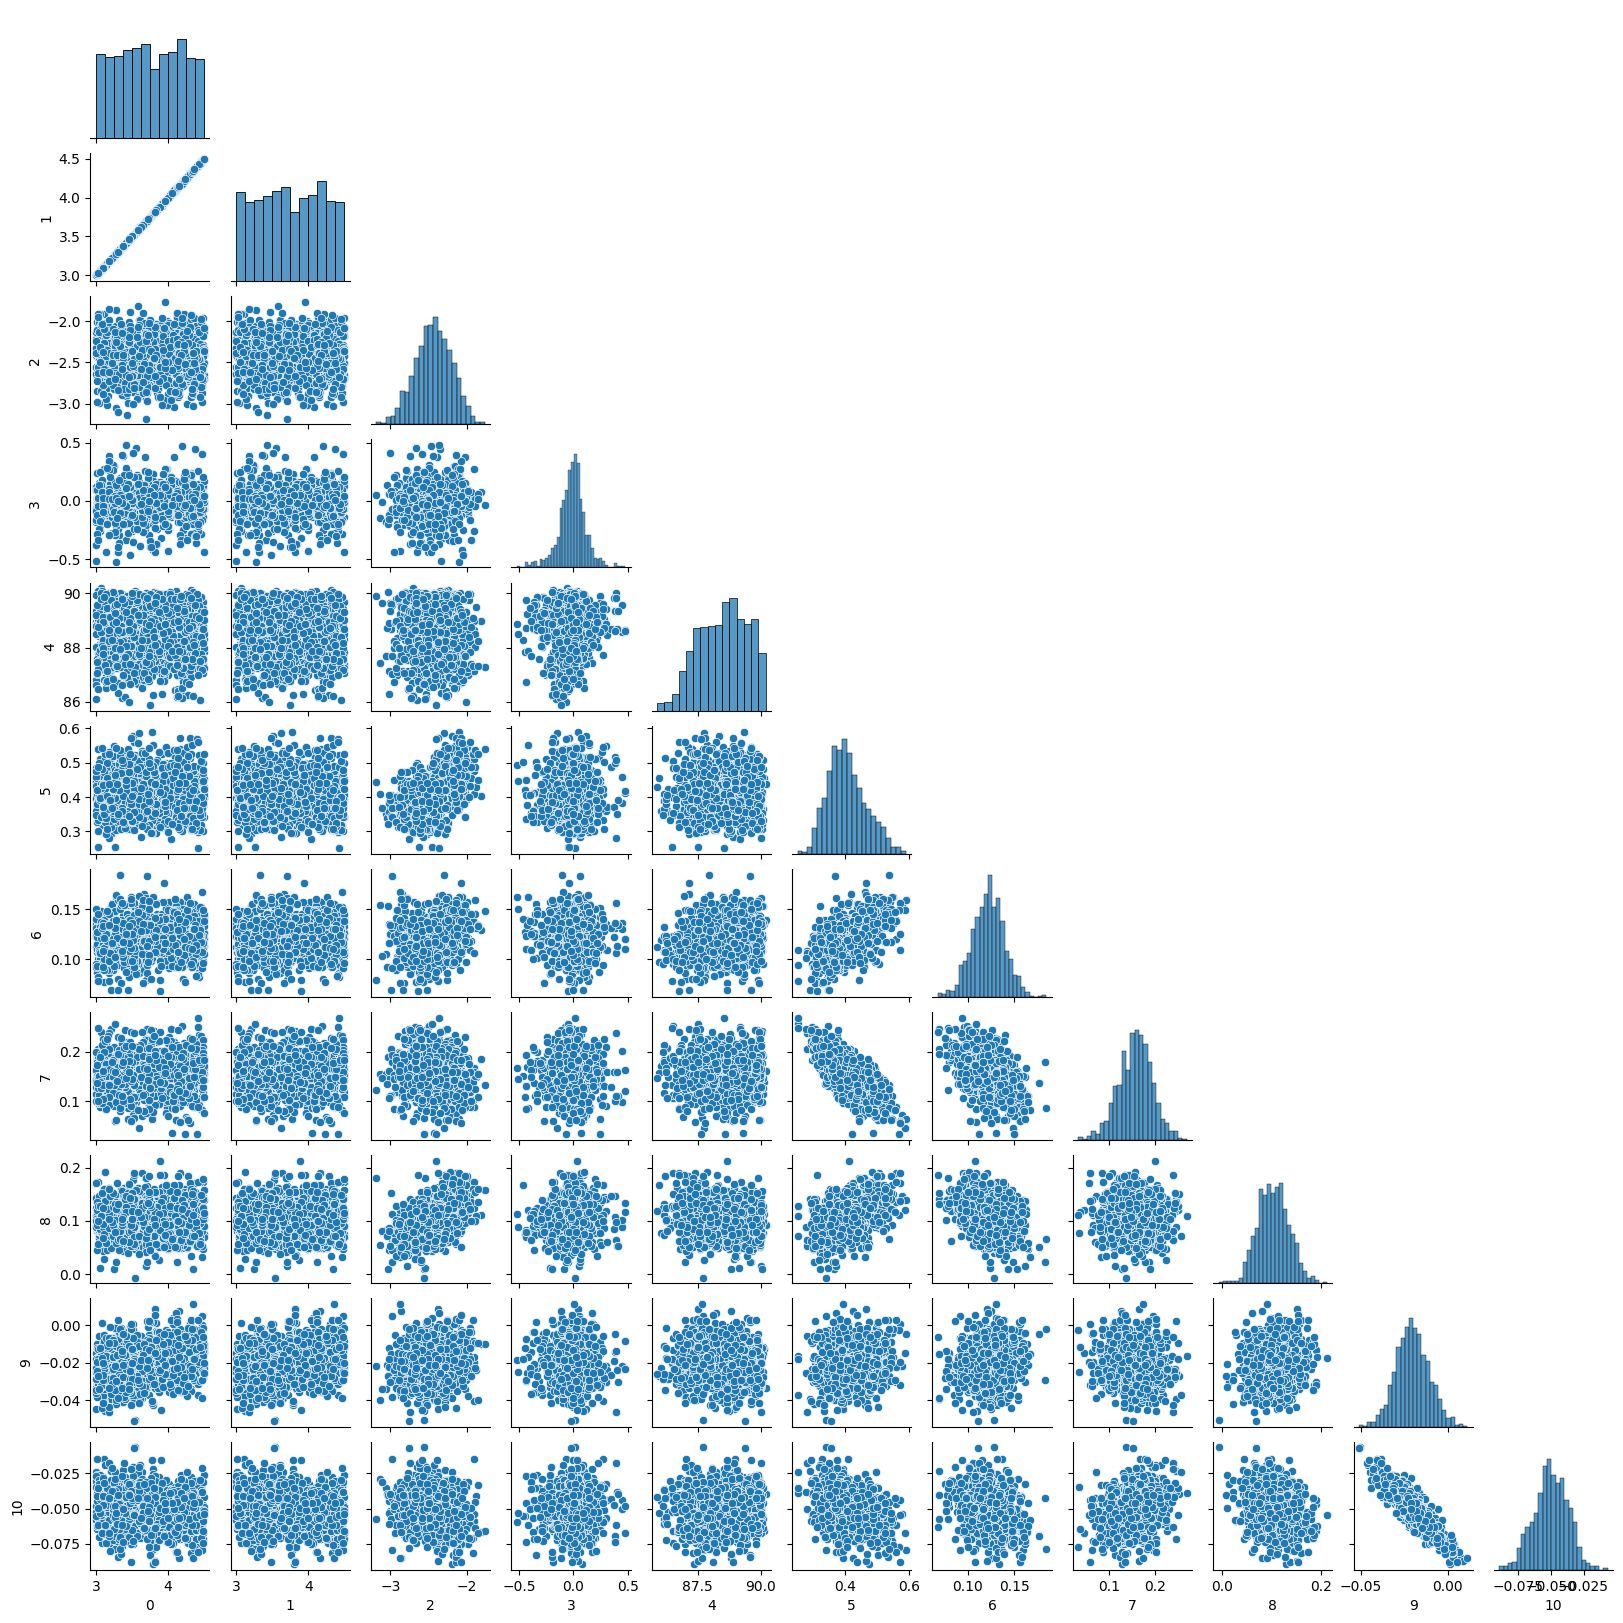

[0.43293879 0.43273193 0.23504437 0.12861232 0.95131138 0.05960234
 0.01728371 0.03689502 0.03149259 0.00954176 0.01307127]


Processing in parallel:   0%|                                                                  | 0/1099 [00:00<?, ?it/s]

locallocal
local

local
local
local
SpawnPoolWorker-60 60
CUDA_VISIBLE_DEVICES= 0
SpawnPoolWorker-56 56
CUDA_VISIBLE_DEVICES= 0
SpawnPoolWorker-55 55
CUDA_VISIBLE_DEVICES= 0
SpawnPoolWorker-58 58
CUDA_VISIBLE_DEVICES= 0
SpawnPoolWorker-59 59
CUDA_VISIBLE_DEVICES= 0
SpawnPoolWorker-57 57
CUDA_VISIBLE_DEVICES= 0


Processing in parallel: 100%|███████████████████████████████████████████████████████| 1099/1099 [22:48<00:00,  1.24s/it]


(1084, 11)


/home/jcottaar/miniconda3/envs/xlab/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


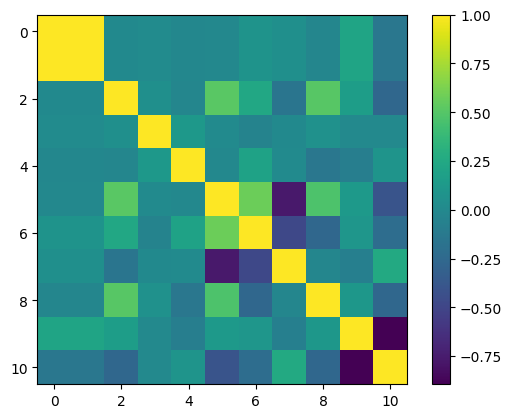

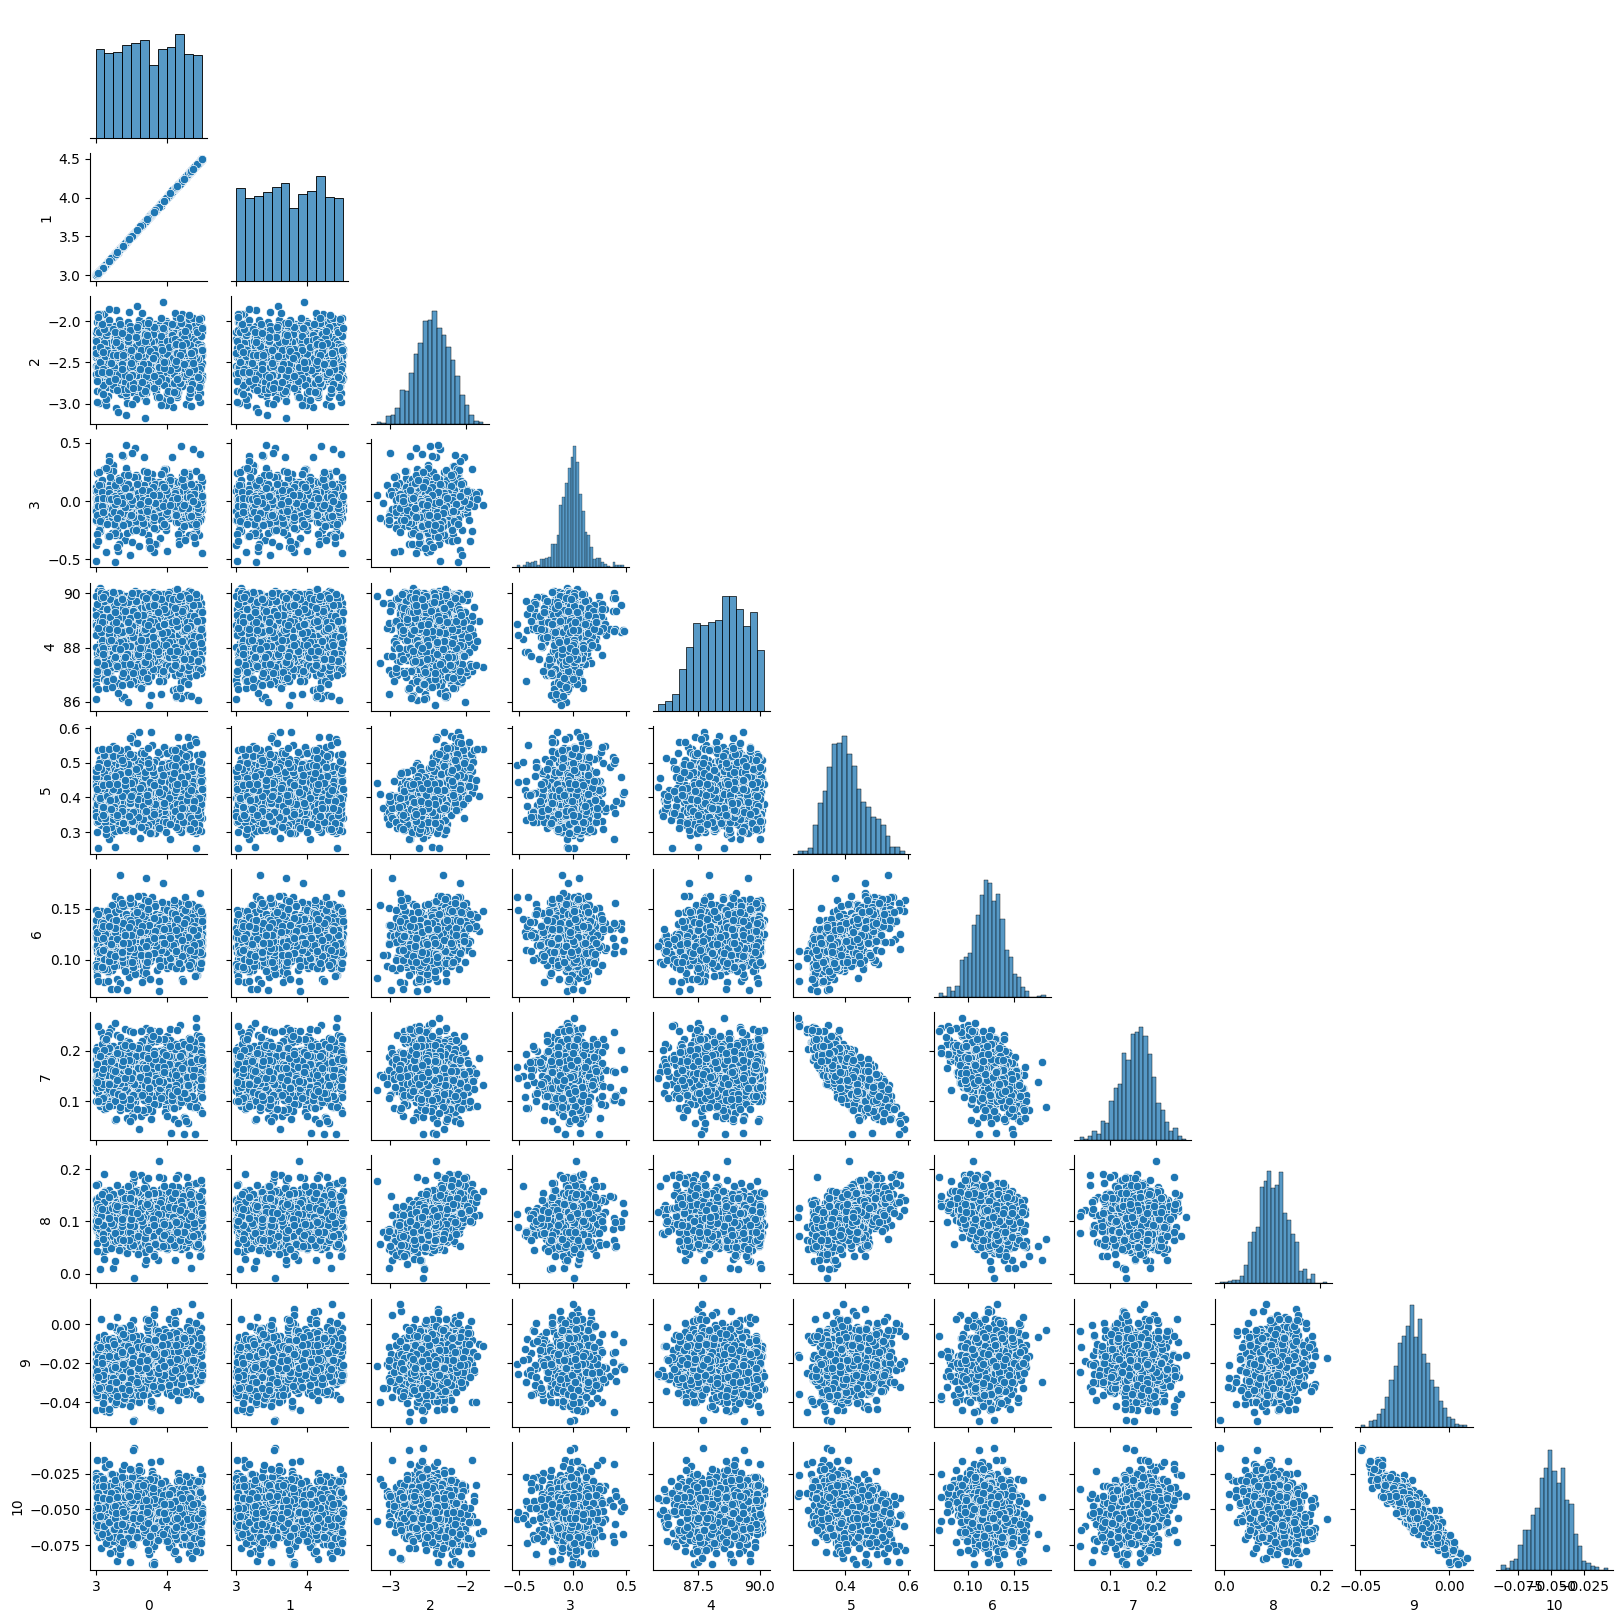

[0.43293923 0.43273165 0.23504767 0.12848508 0.95253251 0.05949297
 0.01684426 0.0365712  0.03132854 0.00928205 0.01266226]


In [8]:
for ii in range(50):
    if ii==5:
        data = copy.deepcopy(train_data2)
    data = model.infer(data)
    transit_parameters = []
    for d in data:
        d.diagnostics['starting_par'] = d.diagnostics['par_mean']
        modelr.results['model_samples'].m['signal'].set_parameters(d.diagnostics['par_samples'])
        transit_parameters.append(modelr.results['model_samples'].m['signal'].m['main'].m['transit'].get_parameters()[:,0])
    transit_parameters = np.array(transit_parameters)
    
    transit_parameters = remove_outlier(transit_parameters,4)
    print(transit_parameters.shape)

    plt.figure()
    plt.imshow(np.corrcoef(transit_parameters.T))
    plt.colorbar()
    sns.pairplot(pd.DataFrame(transit_parameters), diag_kind="hist", corner=True, height=1.5)
    plt.pause(0.0001)

    cov_est = np.cov(transit_parameters.T)
    print(np.sqrt(np.diag(cov_est)))
    mu_est = np.mean(transit_parameters,0)
    def modify_func(model, cc):
        model.m['signal'].m['main'].m['transit'].cov_override = cc[0]
        model.m['signal'].m['main'].m['transit'].mu_override = cc[1]
        # cur_params = model.m['signal'].m['main'].m['transit'].get_parameters()
        # cur_params[-model.m['signal'].m['main'].m['transit'].number_of_extra_parameters:,0] = cc[1]
        # model.m['signal'].m['main'].m['transit'].set_parameters(cur_params)
        return model
    model.model_options.modify_func = modify_func
    model.model_options.modify_func_input = [cov_est, mu_est]
    
    kgs.dill_save(kgs.temp_dir + f'transit_model_tuning{ii}.pickle', (cov_est, mu_est))

In [9]:
# import subprocess

# # Hibernate Windows
# # subprocess.run(
# #     ["/mnt/c/Windows/System32/shutdown.exe", "/a"],  # add "/f" to force-close apps
# #     check=True
# # )
# subprocess.run(
#     ["/mnt/c/Windows/System32/shutdown.exe", "/h"],  # add "/f" to force-close apps
#     check=True
# )

CompletedProcess(args=['/mnt/c/Windows/System32/shutdown.exe', '/h'], returncode=0)